## Problem Statement

### Business Context

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.).



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 20000 observations in the training set and 5000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generators could be repaired before failing/breaking to reduce the overall maintenance cost.
The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model. These will result in repairing costs.
- False negatives (FN) are real failures where there is no detection by the model. These will result in replacement costs.
- False positives (FP) are detections where there is no failure. These will result in inspection costs.

It is given that the cost of repairing a generator is much less than the cost of replacing it, and the cost of inspection is less than the cost of repair.

“1” in the target variables should be considered as “failure” and “0” represents “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models.
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
#!pip install pandas==1.5.3 numpy==1.25.2 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 imbalanced-learn==0.10.1 xgboost==2.0.3 threadpoolctl==3.3.0 -q --user

In [2]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To tune model, get different metric scores, and split data
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
)
from sklearn import metrics

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score

# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# To impute missing values
from sklearn.impute import SimpleImputer

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To do hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, cross_val_score

# To suppress scientific notations
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To suppress warnings
import warnings

warnings.filterwarnings("ignore")

**Note:** After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading the dataset

In [4]:
dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ReneWind_Train.csv.csv')

In [5]:
dataset_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ReneWind_Test.csv.csv')

Testing data set

In [6]:
data = dataset.copy()

In [7]:
data_test = dataset_test.copy()

## Data Overview

- Observations
- Sanity checks

In [8]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-4.465,-4.679,3.102,0.506,-0.221,-2.033,-2.911,0.051,-1.522,3.762,-5.715,0.736,0.981,1.418,-3.376,-3.047,0.306,2.914,2.270,4.395,-2.388,0.646,-1.191,3.133,0.665,-2.511,-0.037,0.726,-3.982,-1.073,1.667,3.060,-1.690,2.846,2.235,6.667,0.444,-2.369,2.951,-3.480,0
1,3.366,3.653,0.910,-1.368,0.332,2.359,0.733,-4.332,0.566,-0.101,1.914,-0.951,-1.255,-2.707,0.193,-4.769,-2.205,0.908,0.757,-5.834,-3.065,1.597,-1.757,1.766,-0.267,3.625,1.500,-0.586,0.783,-0.201,0.025,-1.795,3.033,-2.468,1.895,-2.298,-1.731,5.909,-0.386,0.616,0
2,-3.832,-5.824,0.634,-2.419,-1.774,1.017,-2.099,-3.173,-2.082,5.393,-0.771,1.107,1.144,0.943,-3.164,-4.248,-4.039,3.689,3.311,1.059,-2.143,1.650,-1.661,1.680,-0.451,-4.551,3.739,1.134,-2.034,0.841,-1.600,-0.257,0.804,4.086,2.292,5.361,0.352,2.940,3.839,-4.309,0
3,1.618,1.888,7.046,-1.147,0.083,-1.530,0.207,-2.494,0.345,2.119,-3.053,0.460,2.705,-0.636,-0.454,-3.174,-3.404,-1.282,1.582,-1.952,-3.517,-1.206,-5.628,-1.818,2.124,5.295,4.748,-2.309,-3.963,-6.029,4.949,-3.584,-2.577,1.364,0.623,5.550,-1.527,0.139,3.101,-1.277,0
4,-0.111,3.872,-3.758,-2.983,3.793,0.545,0.205,4.849,-1.855,-6.220,1.998,4.724,0.709,-1.989,-2.633,4.184,2.245,3.734,-6.313,-5.380,-0.887,2.062,9.446,4.490,-3.945,4.582,-8.780,-3.383,5.107,6.788,2.044,8.266,6.629,-10.069,1.223,-3.230,1.687,-2.164,-3.645,6.510,0


In [9]:
data_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
0,-0.613,-3.820,2.202,1.300,-1.185,-4.496,-1.836,4.723,1.206,-0.342,-5.123,1.017,4.819,3.269,-2.984,1.387,2.032,-0.512,-1.023,7.339,-2.242,0.155,2.054,-2.772,1.851,-1.789,-0.277,-1.255,-3.833,-1.505,1.587,2.291,-5.411,0.870,0.574,4.157,1.428,-10.511,0.455,-1.448,0
1,0.390,-0.512,0.527,-2.577,-1.017,2.235,-0.441,-4.406,-0.333,1.967,1.797,0.410,0.638,-1.390,-1.883,-5.018,-3.827,2.418,1.762,-3.242,-3.193,1.857,-1.708,0.633,-0.588,0.084,3.014,-0.182,0.224,0.865,-1.782,-2.475,2.494,0.315,2.059,0.684,-0.485,5.128,1.721,-1.488,0
2,-0.875,-0.641,4.084,-1.590,0.526,-1.958,-0.695,1.347,-1.732,0.466,-4.928,3.565,-0.449,-0.656,-0.167,-1.630,2.292,2.396,0.601,1.794,-2.120,0.482,-0.841,1.790,1.874,0.364,-0.169,-0.484,-2.119,-2.157,2.907,-1.319,-2.997,0.460,0.620,5.632,1.324,-1.752,1.808,1.676,0
3,0.238,1.459,4.015,2.534,1.197,-3.117,-0.924,0.269,1.322,0.702,-5.578,-0.851,2.591,0.767,-2.391,-2.342,0.572,-0.934,0.509,1.211,-3.260,0.105,-0.659,1.498,1.100,4.143,-0.248,-1.137,-5.356,-4.546,3.809,3.518,-3.074,-0.284,0.955,3.029,-1.367,-3.412,0.906,-2.451,0
4,5.828,2.768,-1.235,2.809,-1.642,-1.407,0.569,0.965,1.918,-2.775,-0.530,1.375,-0.651,-1.679,-0.379,-4.443,3.894,-0.608,2.945,0.367,-5.789,4.598,4.450,3.225,0.397,0.248,-2.362,1.079,-0.473,2.243,-3.591,1.774,-1.502,-2.227,4.777,-6.560,-0.806,-0.276,-3.858,-0.538,0


In [10]:
data.shape

(20000, 41)

In [11]:
data_test.shape

(5000, 41)

In [12]:
data.duplicated().sum()

0

In [13]:
data_test.duplicated().sum()

0

No duplicates

In [14]:
data.isnull().sum()

,0
V1,18
V2,18
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


In [15]:
data_test.isnull().sum()

,0
V1,5
V2,6
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


There are missing values in sensor V1 & V2

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      19982 non-null  float64
 1   V2      19982 non-null  float64
 2   V3      20000 non-null  float64
 3   V4      20000 non-null  float64
 4   V5      20000 non-null  float64
 5   V6      20000 non-null  float64
 6   V7      20000 non-null  float64
 7   V8      20000 non-null  float64
 8   V9      20000 non-null  float64
 9   V10     20000 non-null  float64
 10  V11     20000 non-null  float64
 11  V12     20000 non-null  float64
 12  V13     20000 non-null  float64
 13  V14     20000 non-null  float64
 14  V15     20000 non-null  float64
 15  V16     20000 non-null  float64
 16  V17     20000 non-null  float64
 17  V18     20000 non-null  float64
 18  V19     20000 non-null  float64
 19  V20     20000 non-null  float64
 20  V21     20000 non-null  float64
 21  V22     20000 non-null  float64
 22

all are numercial features

In [17]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,Target
count,19982.000,19982.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000,20000.000
mean,-0.272,0.440,2.485,-0.083,-0.054,-0.995,-0.879,-0.548,-0.017,-0.013,-1.895,1.605,1.580,-0.951,-2.415,-2.925,-0.134,1.189,1.182,0.024,-3.611,0.952,-0.366,1.134,-0.002,1.874,-0.612,-0.883,-0.986,-0.016,0.487,0.304,0.050,-0.463,2.230,1.515,0.011,-0.344,0.891,-0.876,0.056
std,3.442,3.151,3.389,3.432,2.105,2.041,1.762,3.296,2.161,2.193,3.124,2.930,2.875,1.790,3.355,4.222,3.345,2.592,3.397,3.669,3.568,1.652,4.032,3.912,2.017,3.435,4.369,1.918,2.684,3.005,3.461,5.500,3.575,3.184,2.937,3.801,1.788,3.948,1.753,3.012,0.229
min,-11.876,-12.320,-10.708,-15.082,-8.603,-10.227,-7.950,-15.658,-8.596,-9.854,-14.832,-12.948,-13.228,-7.739,-16.417,-20.374,-14.091,-11.644,-13.492,-13.923,-17.956,-10.122,-14.866,-16.387,-8.228,-11.834,-14.905,-9.269,-12.579,-14.796,-13.723,-19.877,-16.898,-17.985,-15.350,-14.833,-5.478,-17.375,-6.439,-11.024,0.000
25%,-2.737,-1.641,0.207,-2.348,-1.536,-2.347,-2.031,-2.643,-1.495,-1.411,-3.922,-0.397,-0.224,-2.171,-4.415,-5.634,-2.216,-0.404,-1.050,-2.433,-5.930,-0.118,-3.099,-1.468,-1.365,-0.338,-3.652,-2.171,-2.787,-1.867,-1.818,-3.420,-2.243,-2.137,0.336,-0.944,-1.256,-2.988,-0.272,-2.940,0.000
50%,-0.748,0.472,2.256,-0.135,-0.102,-1.001,-0.917,-0.389,-0.068,0.101,-1.921,1.508,1.637,-0.957,-2.383,-2.683,-0.015,0.883,1.279,0.033,-3.533,0.975,-0.262,0.969,0.025,1.951,-0.885,-0.891,-1.176,0.184,0.490,0.052,-0.066,-0.255,2.099,1.567,-0.128,-0.317,0.919,-0.921,0.000
75%,1.840,2.544,4.566,2.131,1.340,0.380,0.224,1.723,1.409,1.477,0.119,3.571,3.460,0.271,-0.359,-0.095,2.069,2.572,3.493,2.512,-1.266,2.026,2.452,3.546,1.397,4.130,2.189,0.376,0.630,2.036,2.731,3.762,2.255,1.437,4.064,3.984,1.176,2.279,2.058,1.120,0.000
max,15.493,13.089,17.091,13.236,8.134,6.976,8.006,11.679,8.138,8.108,11.826,15.081,15.420,5.671,12.246,13.583,16.756,13.180,13.238,16.052,13.840,7.410,14.459,17.163,8.223,16.836,17.560,6.528,10.722,12.506,17.255,23.633,16.692,14.358,15.291,19.330,7.467,15.290,7.760,10.654,1.000


## Exploratory Data Analysis (EDA)

### Plotting histograms and boxplots for all the variables

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting all the features at one go

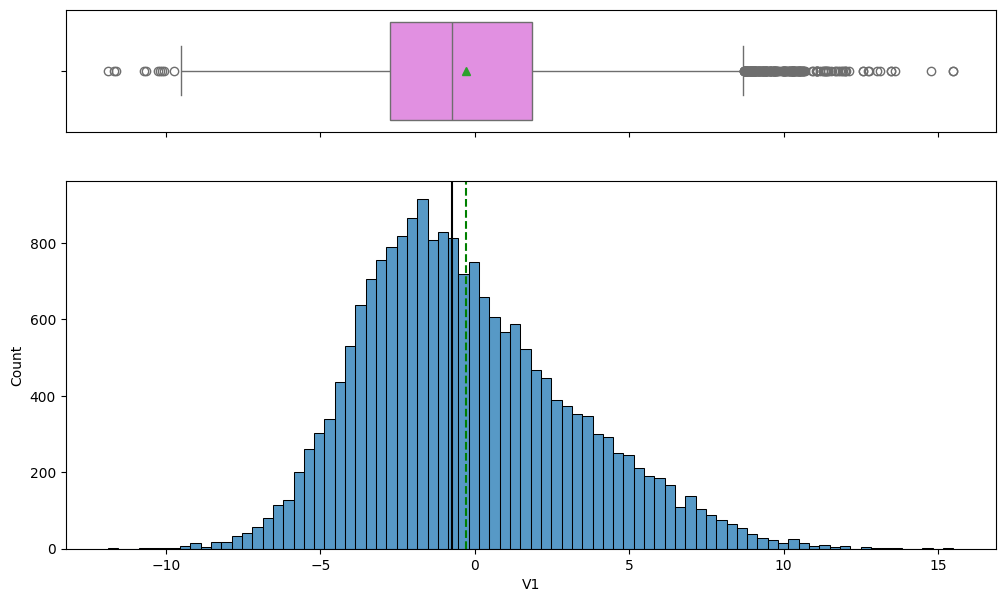

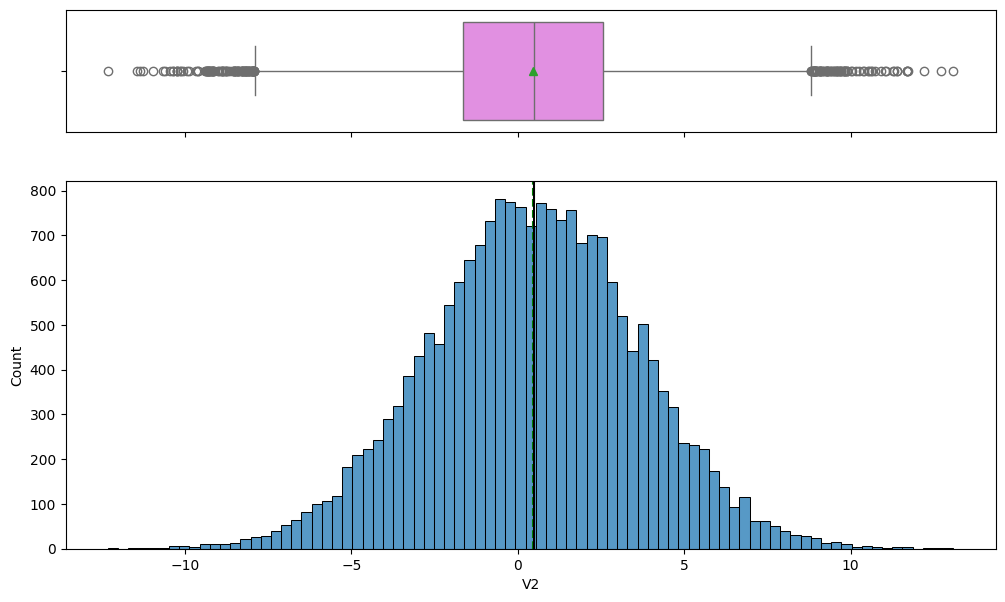

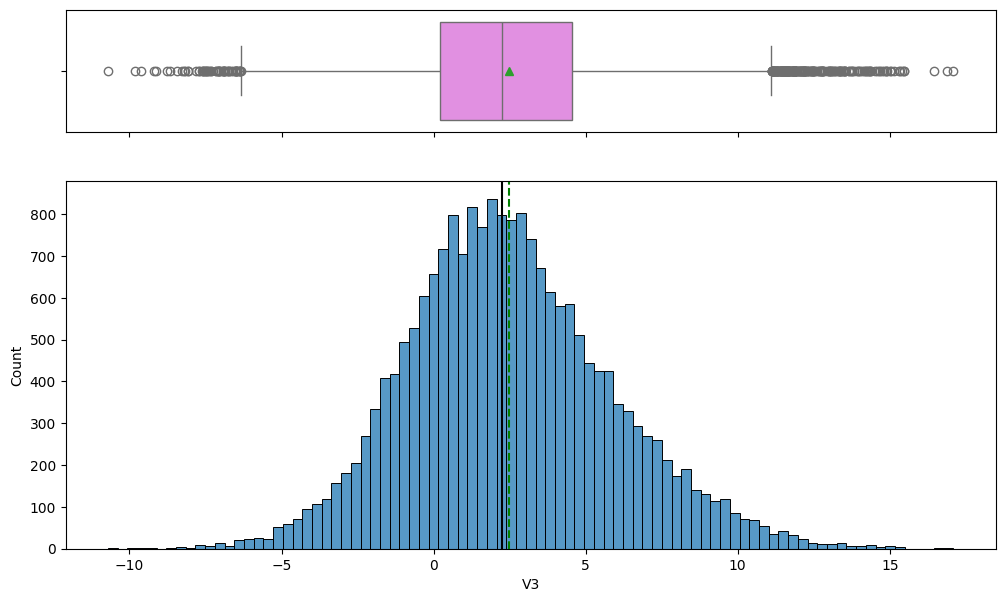

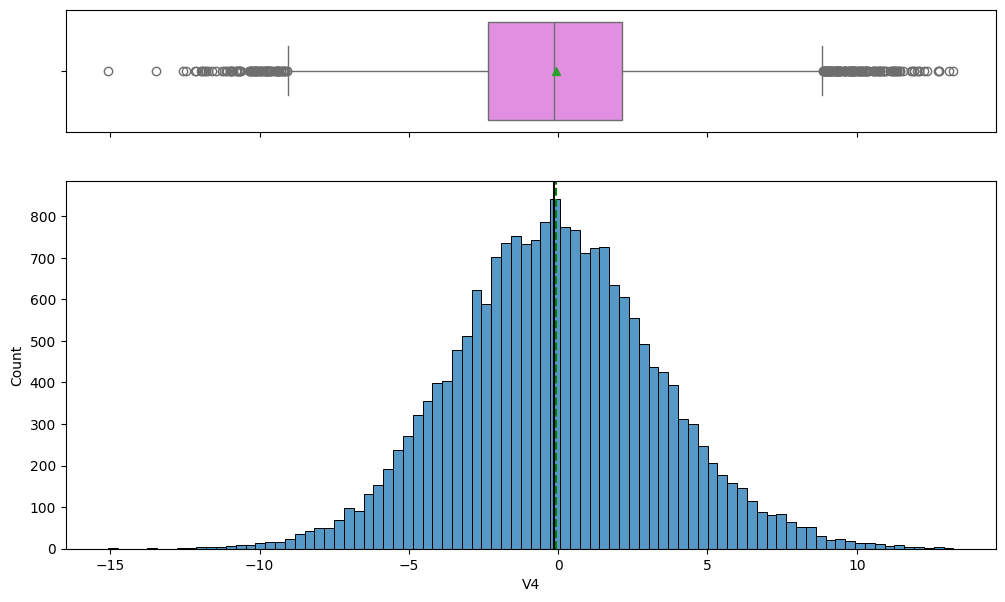

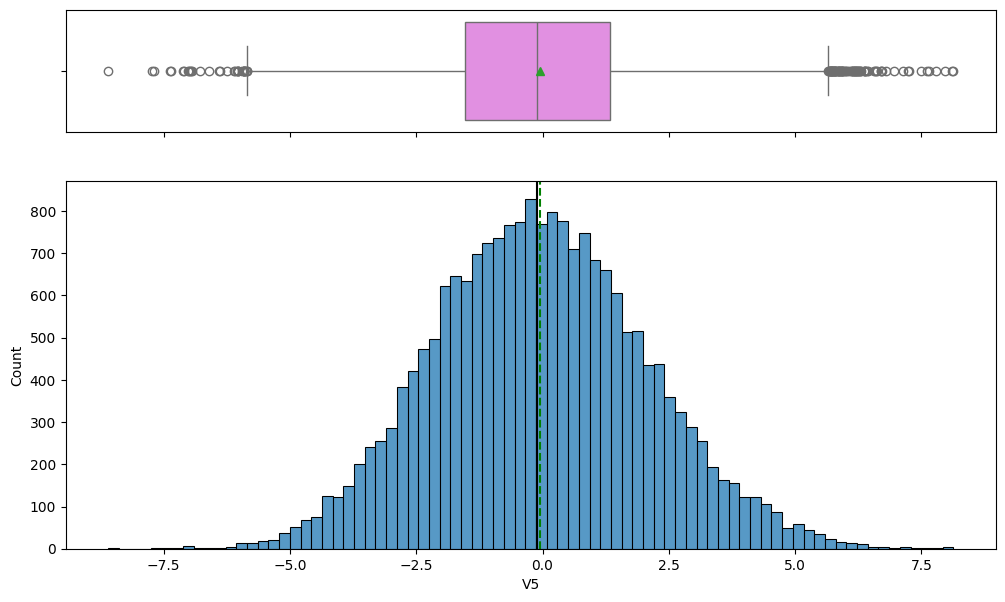

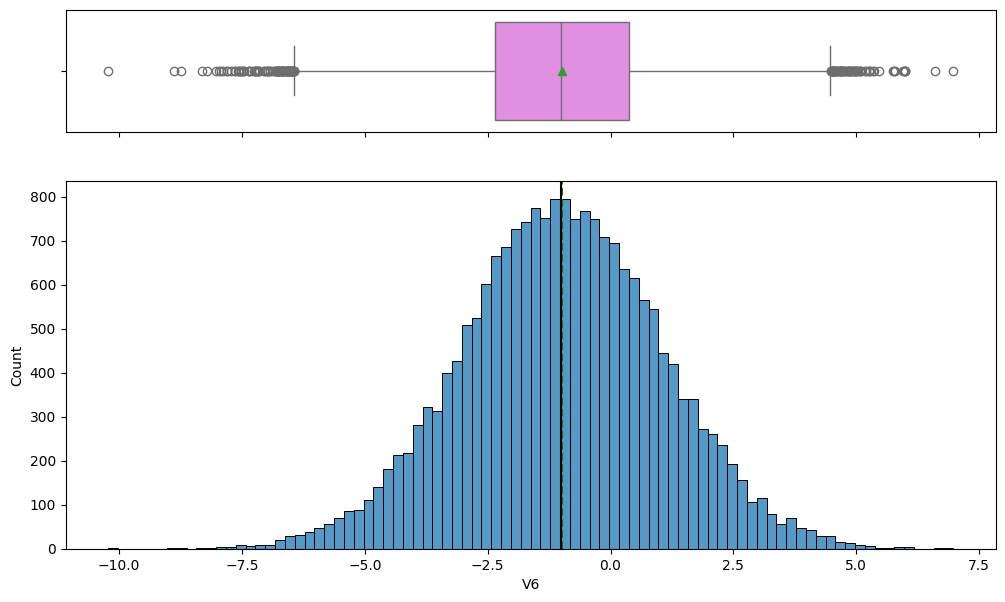

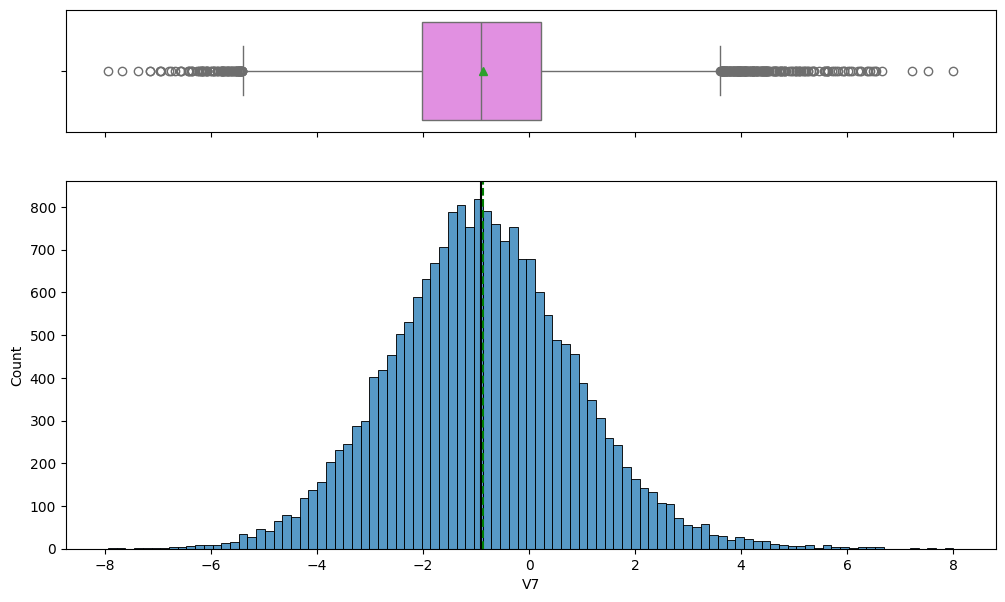

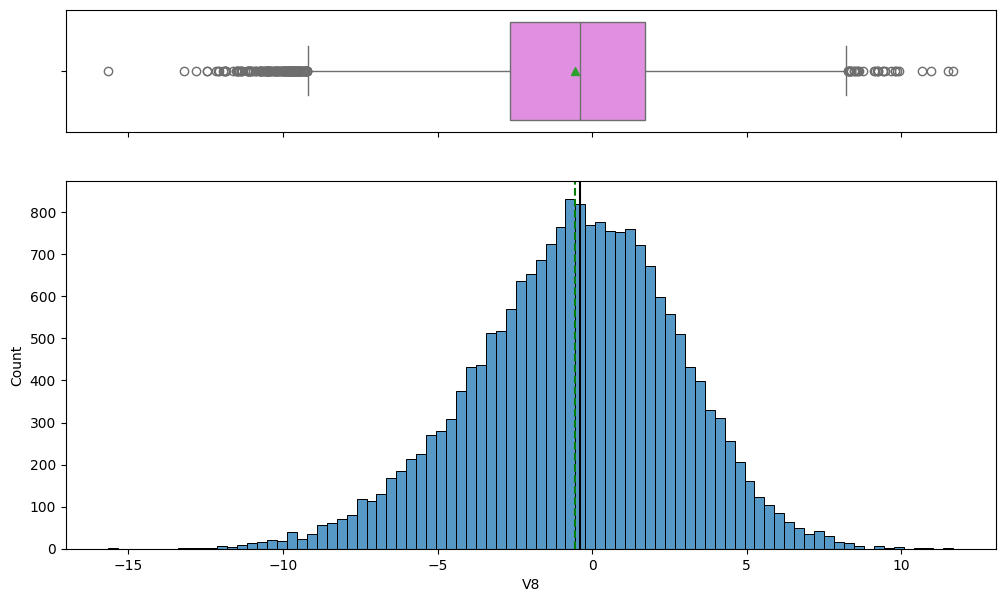

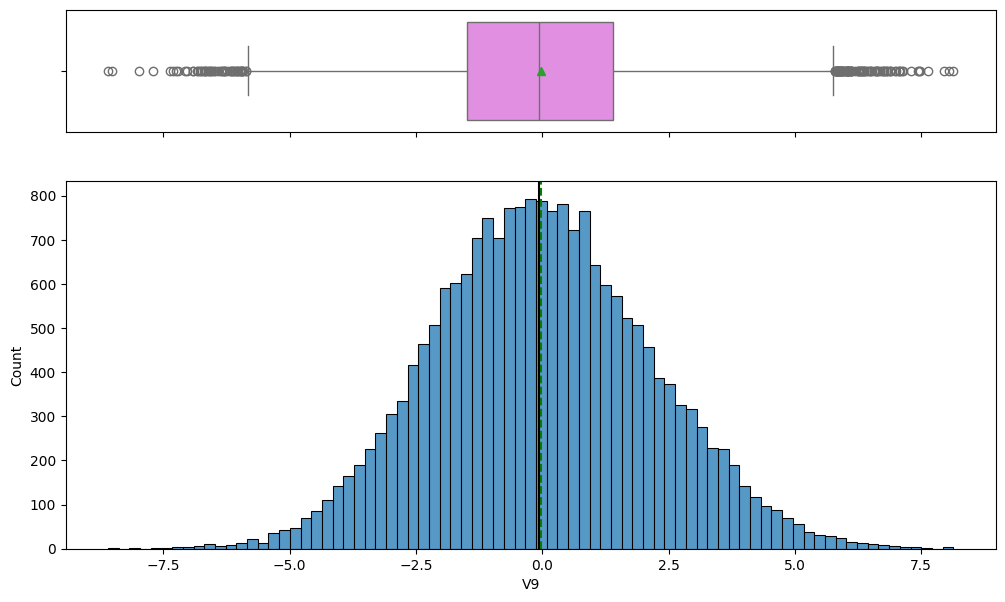

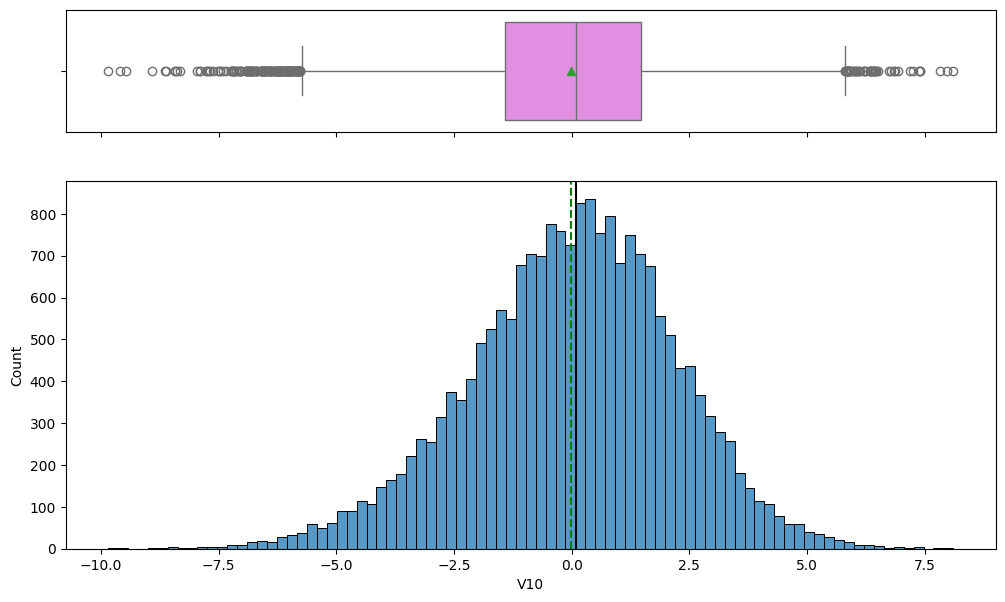

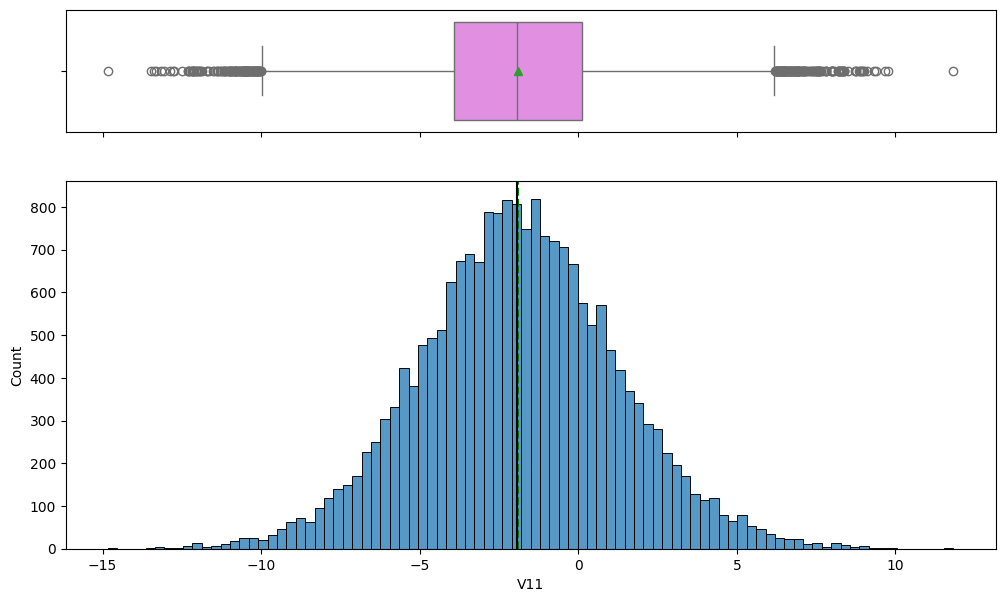

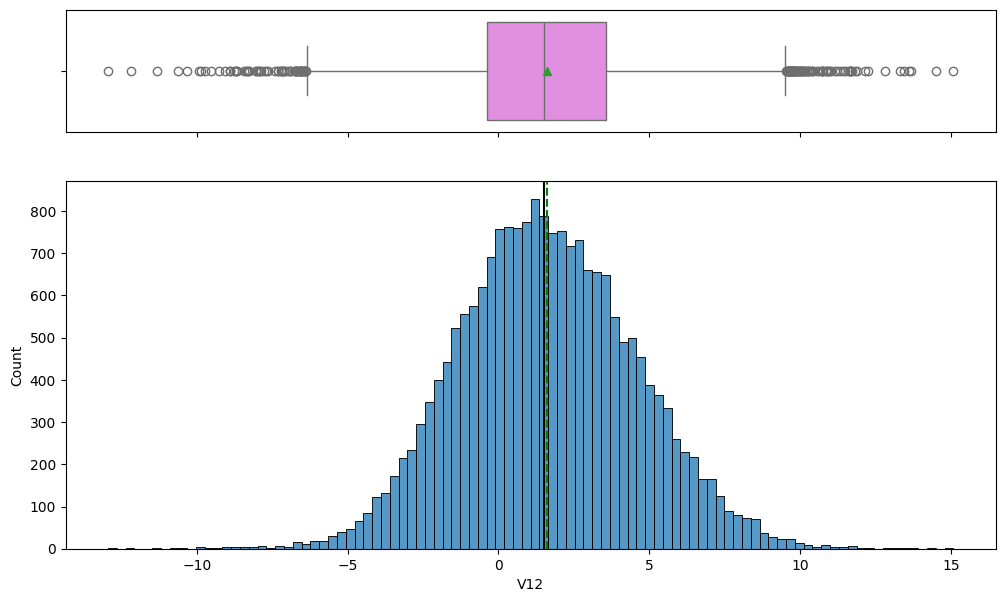

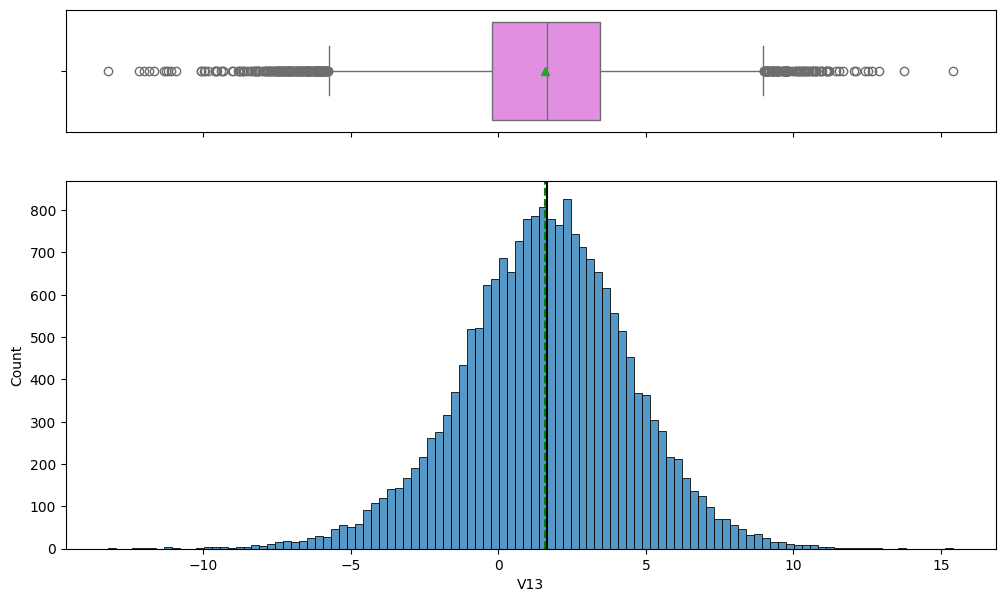

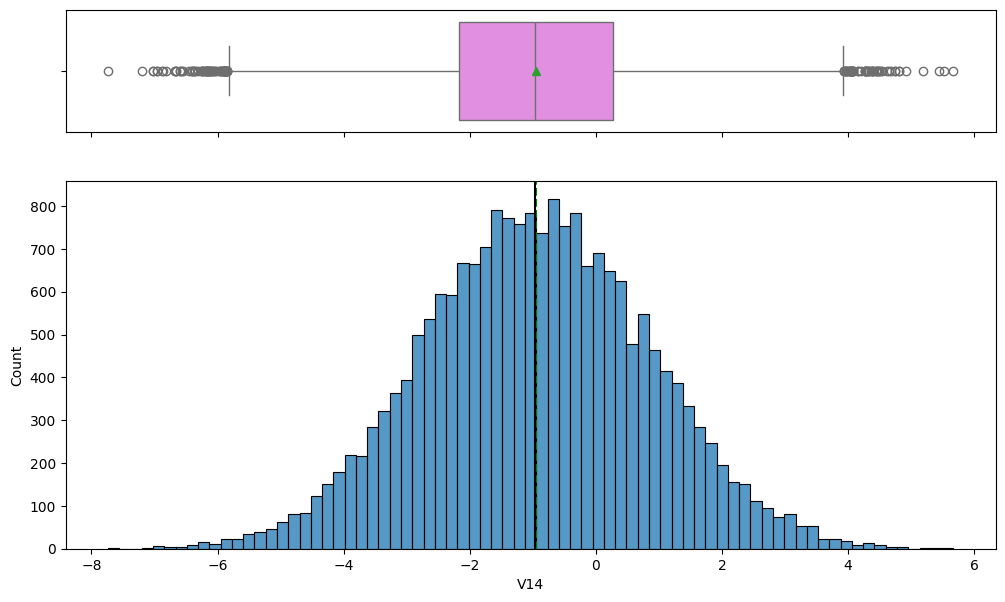

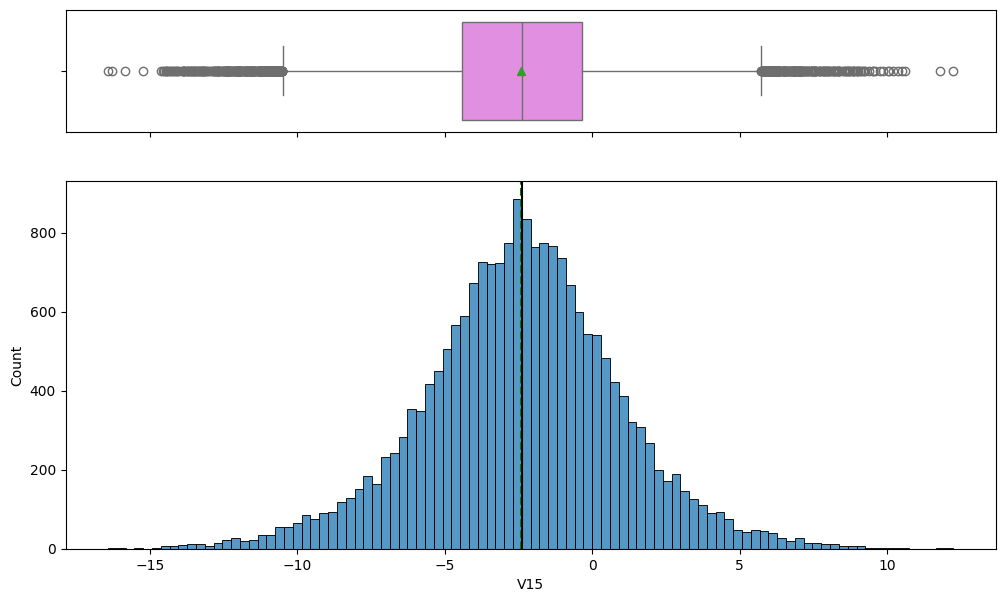

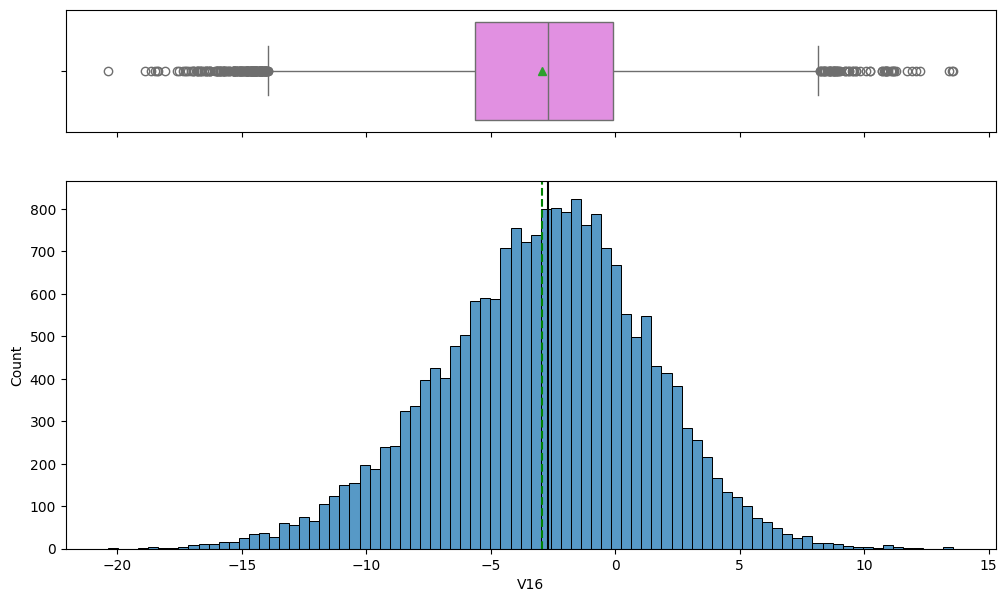

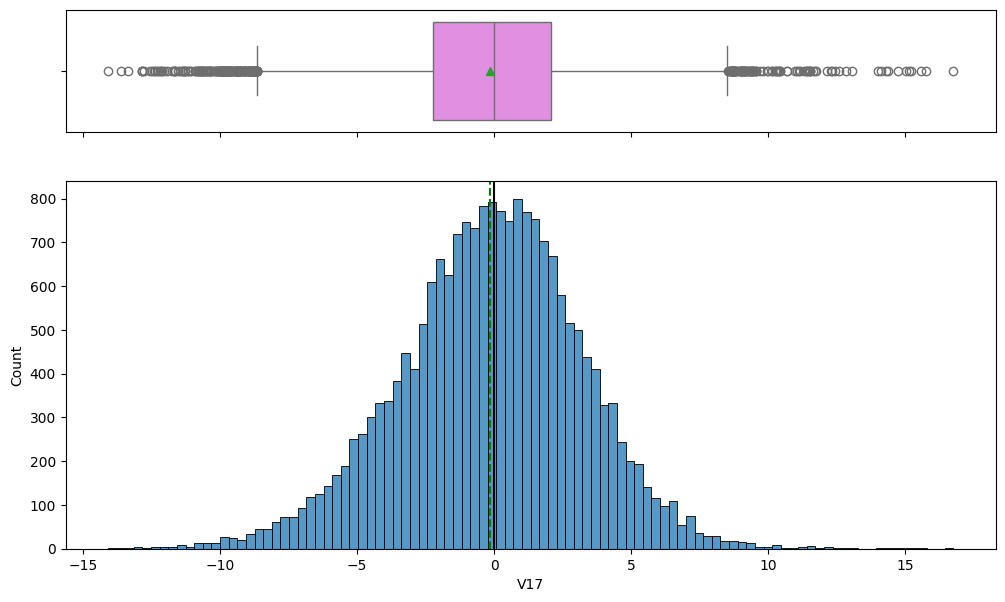

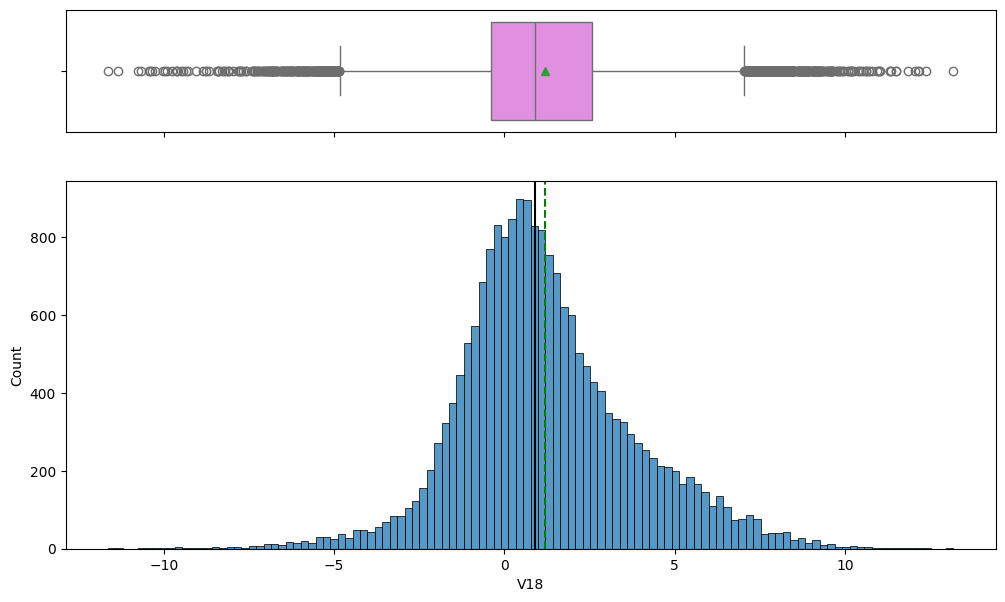

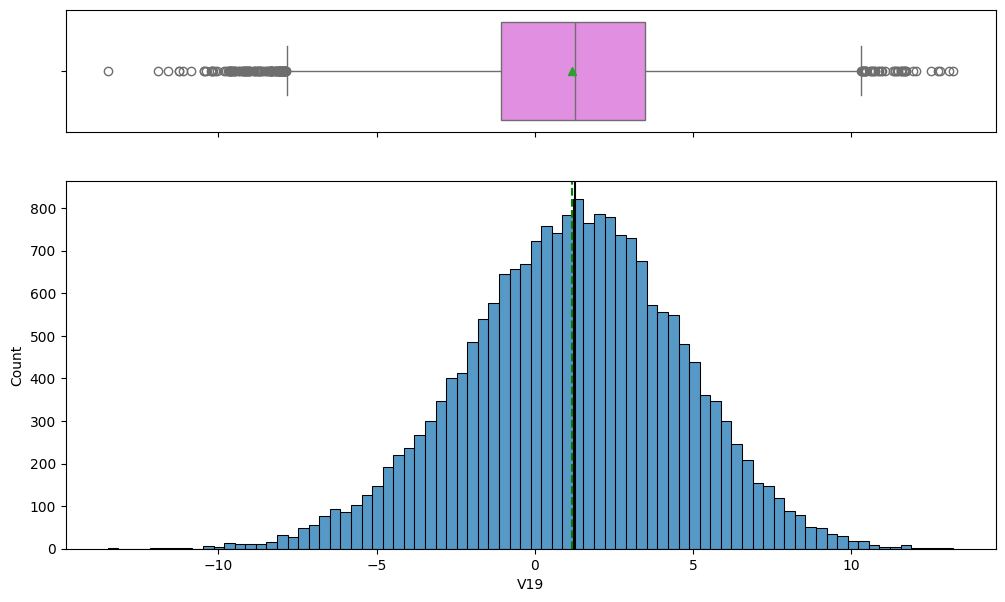

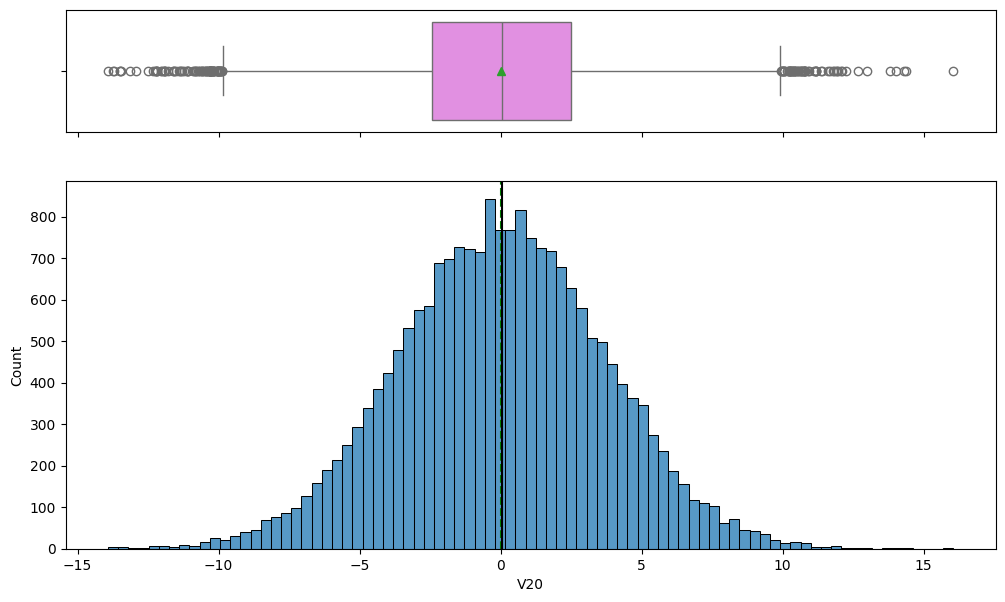

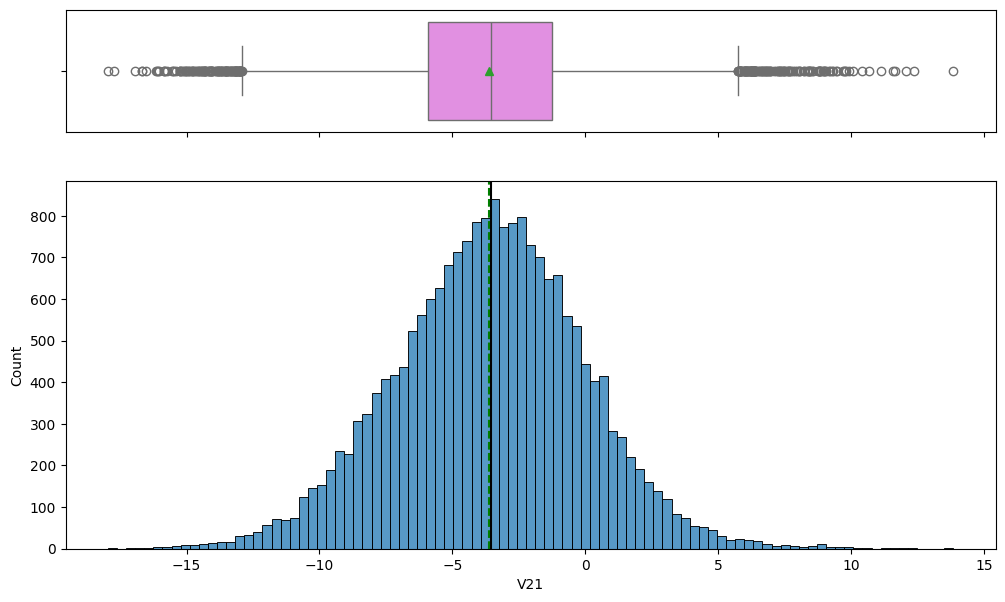

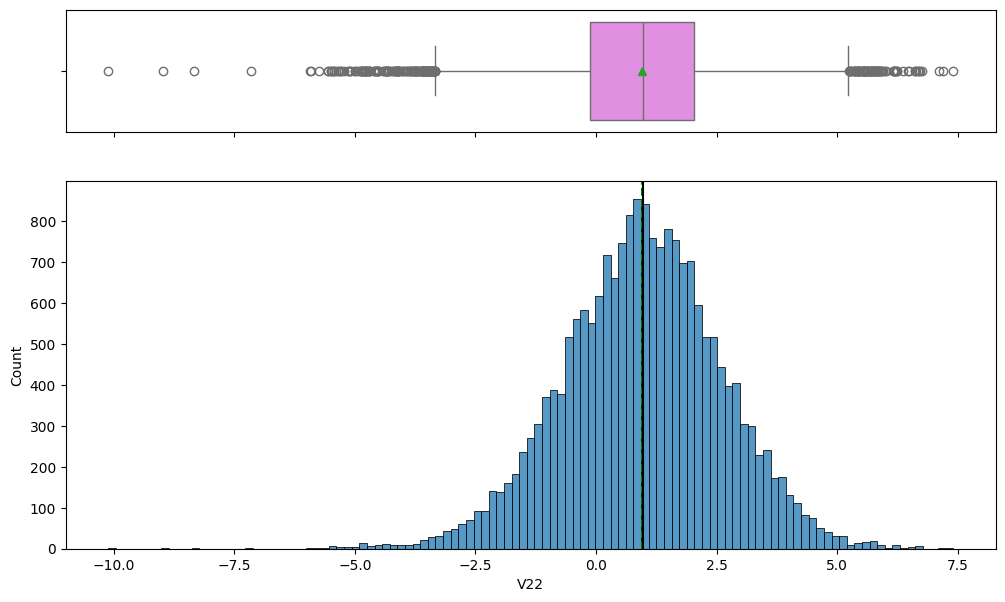

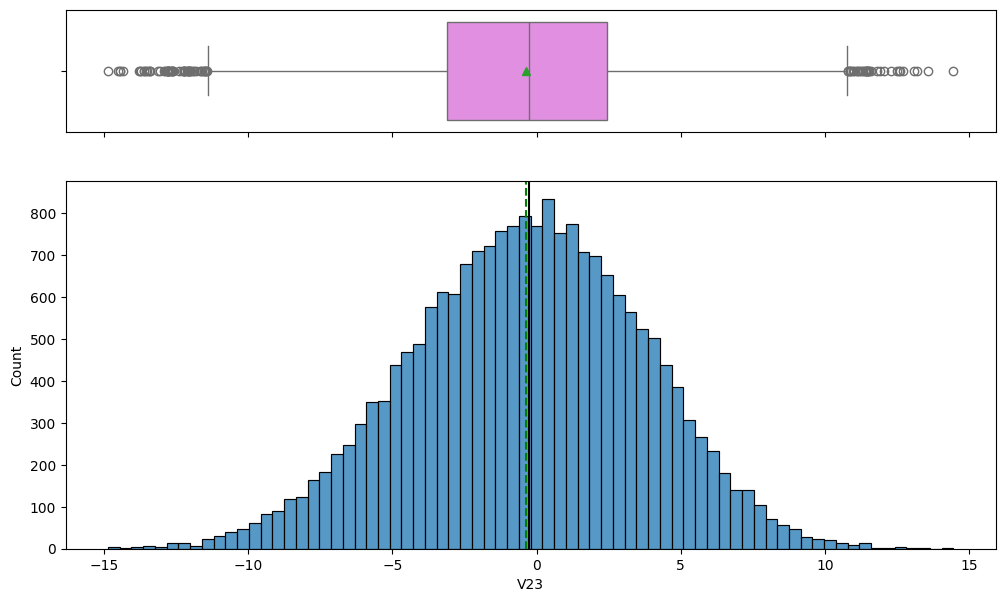

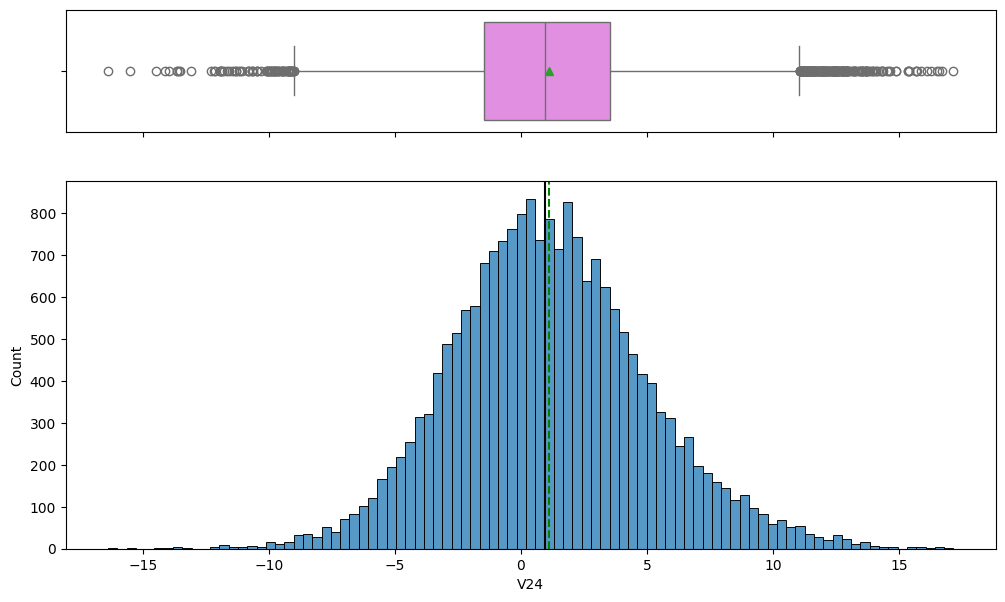

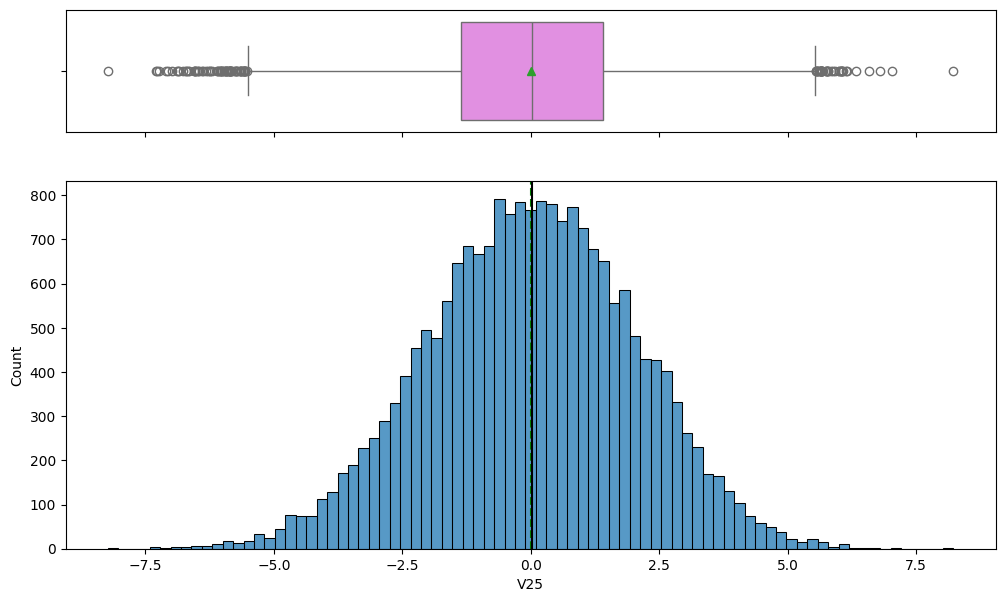

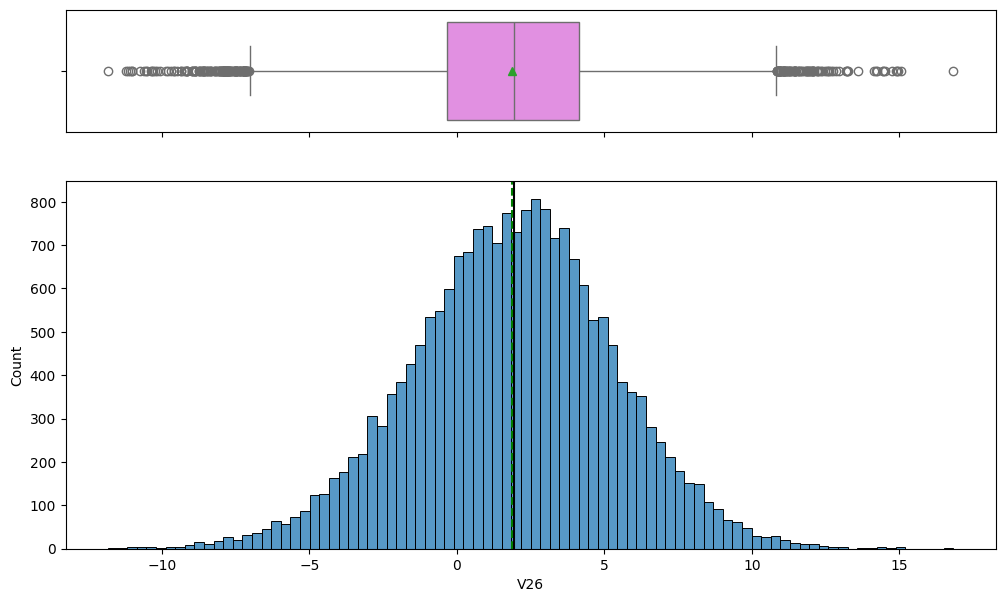

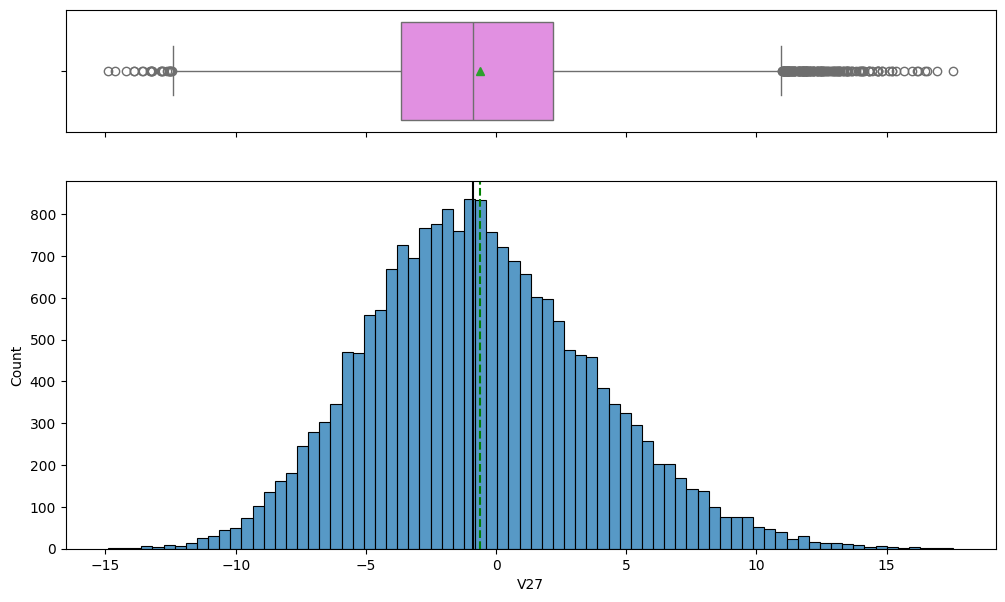

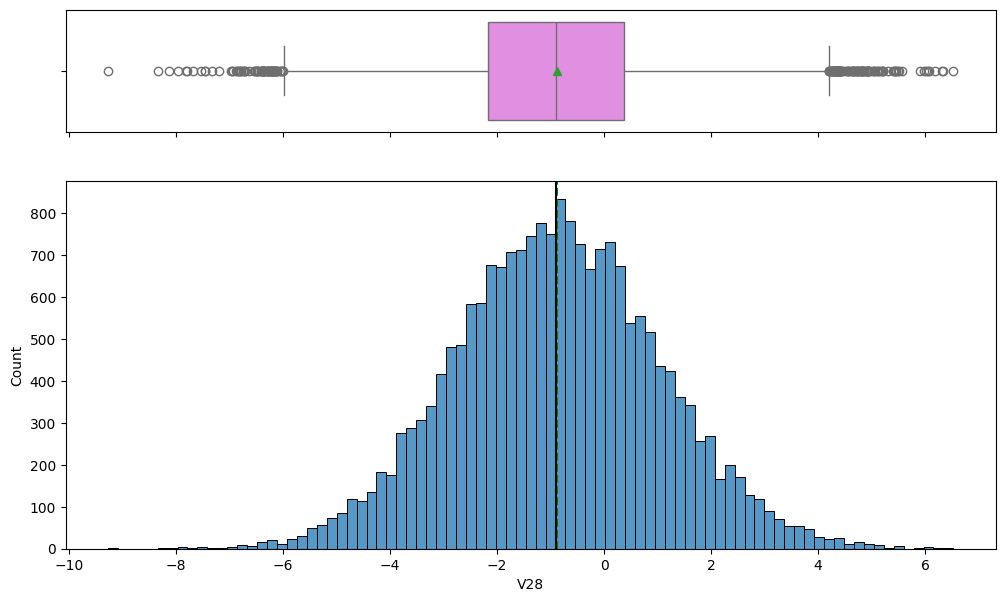

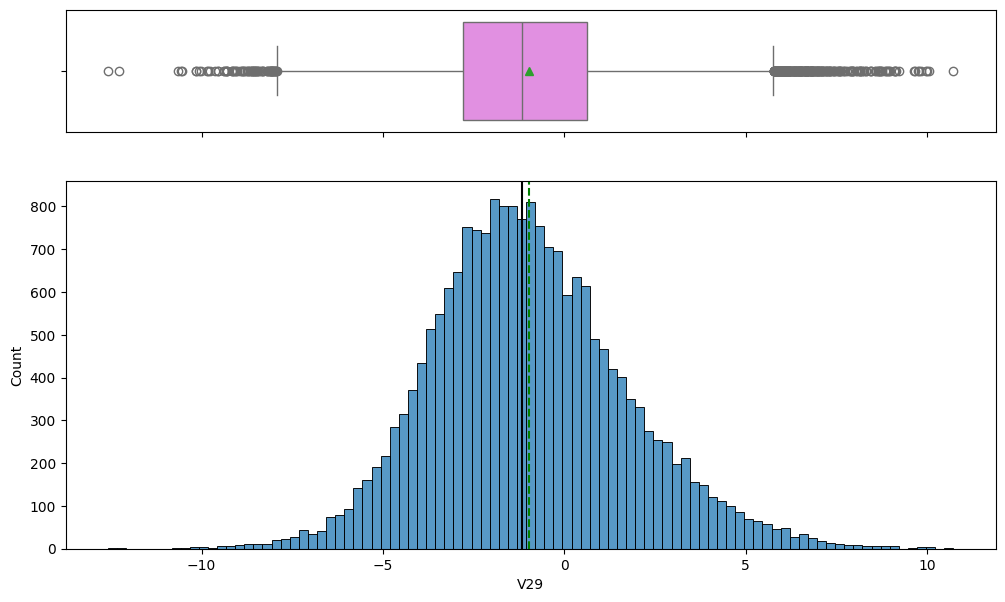

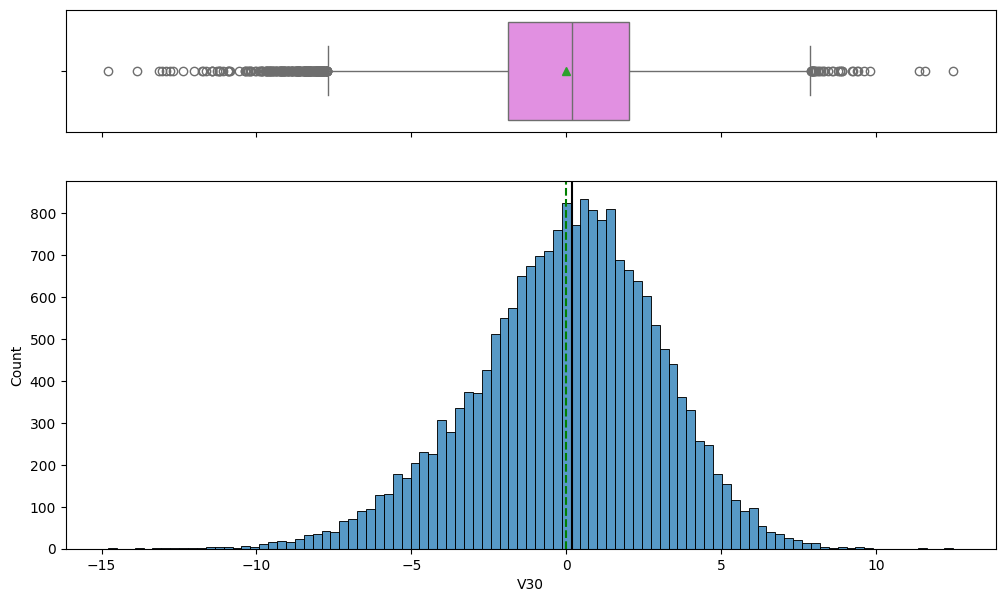

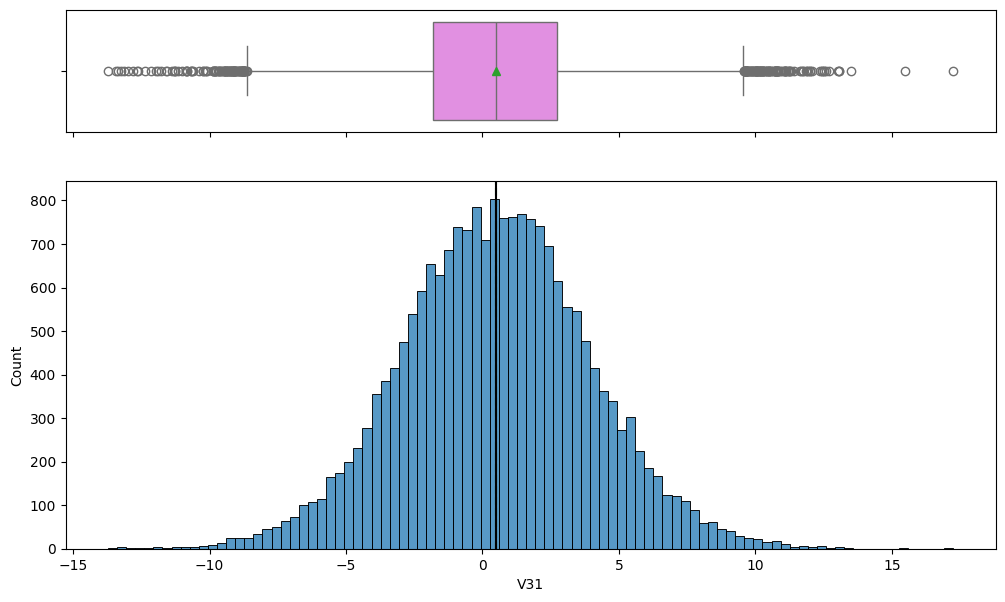

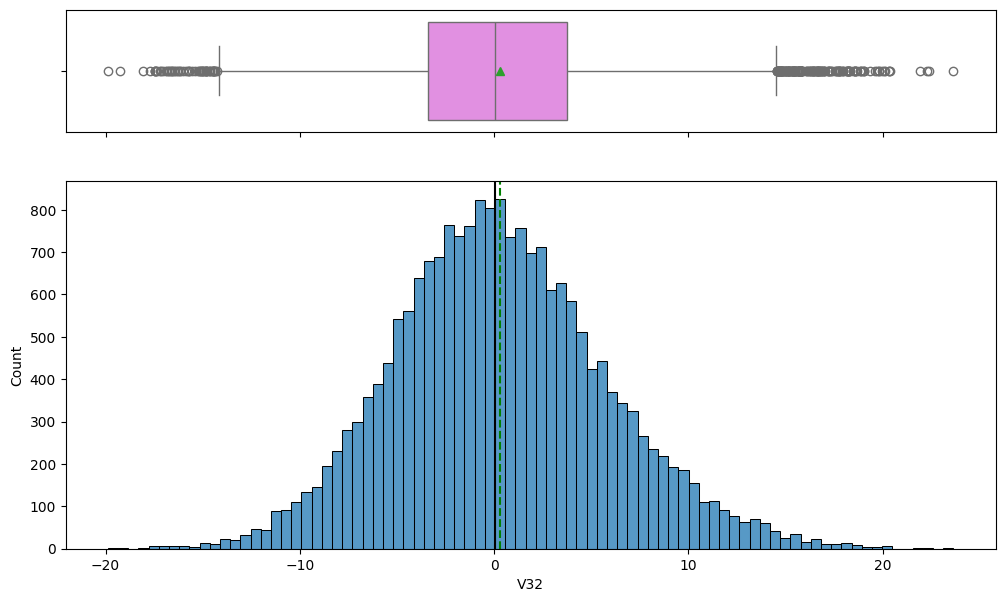

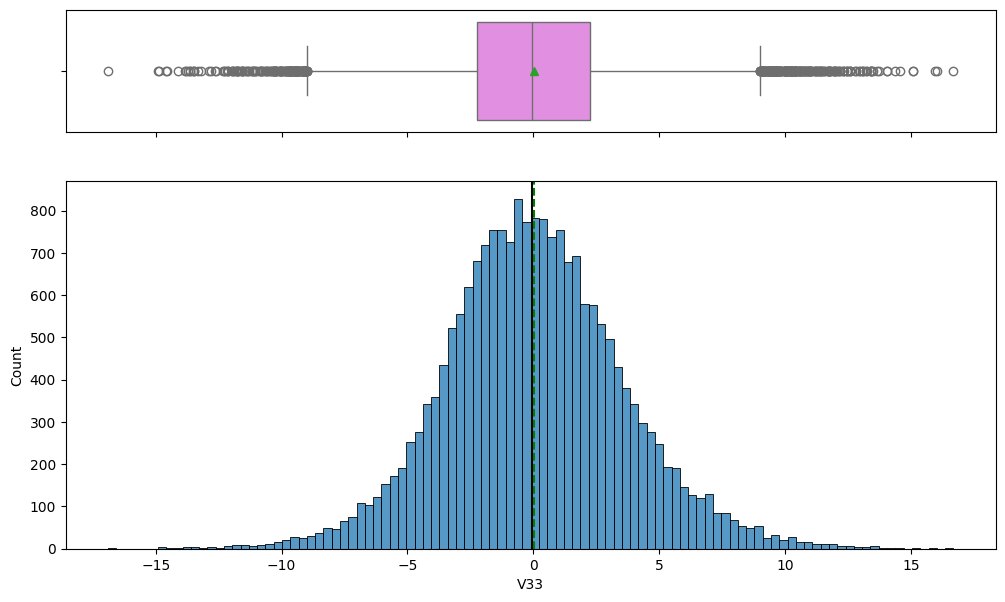

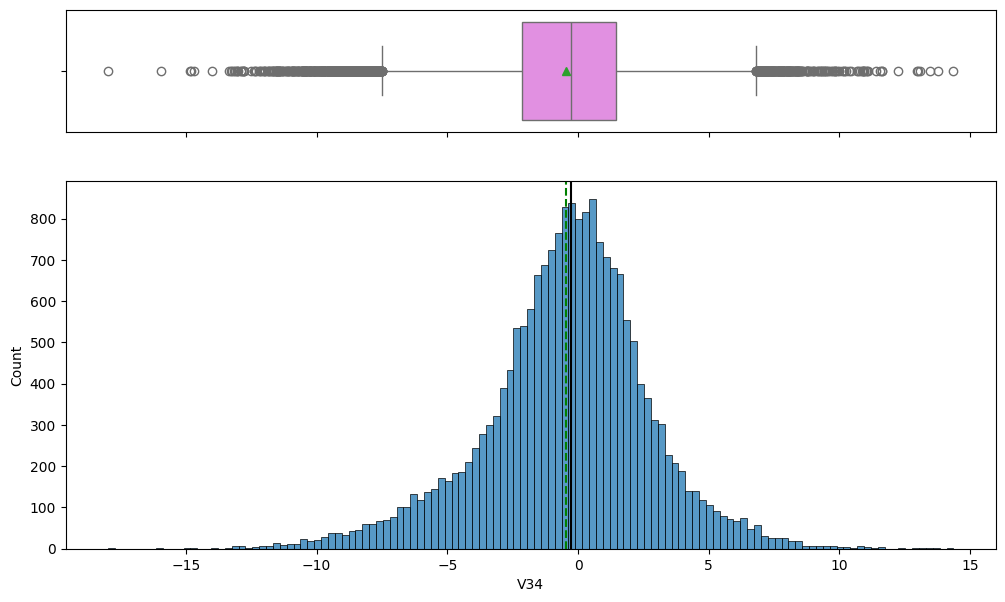

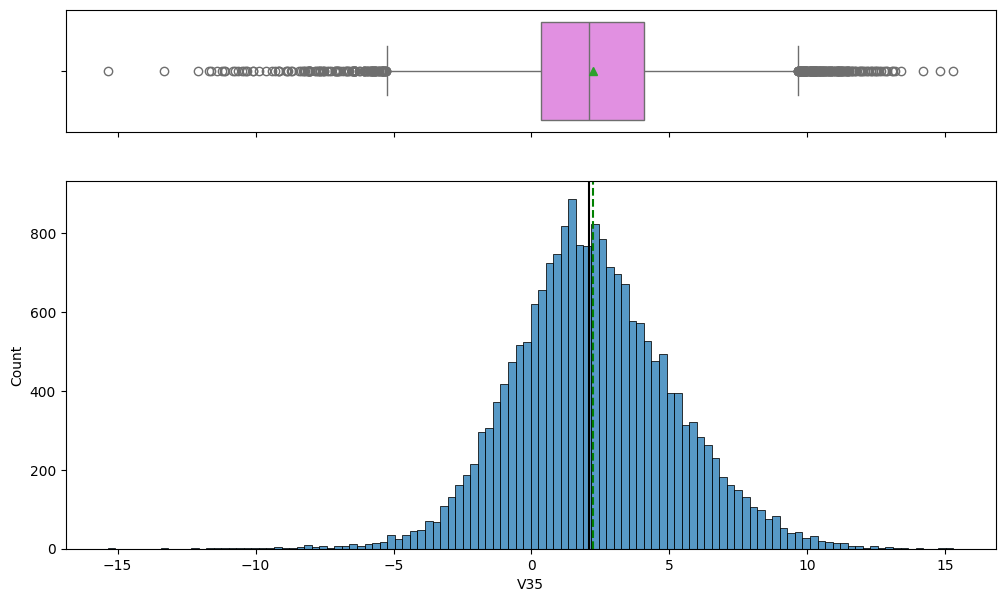

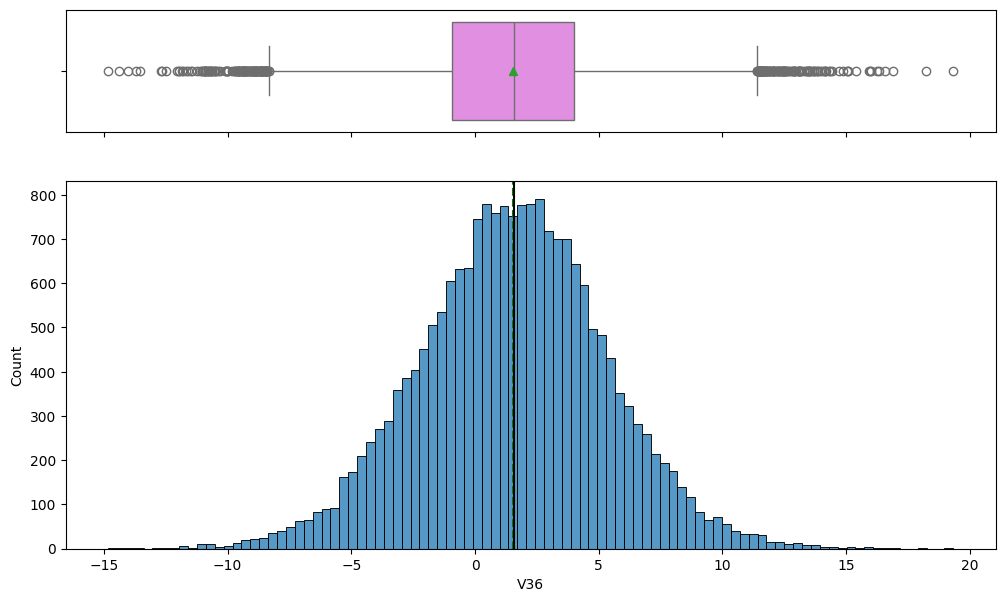

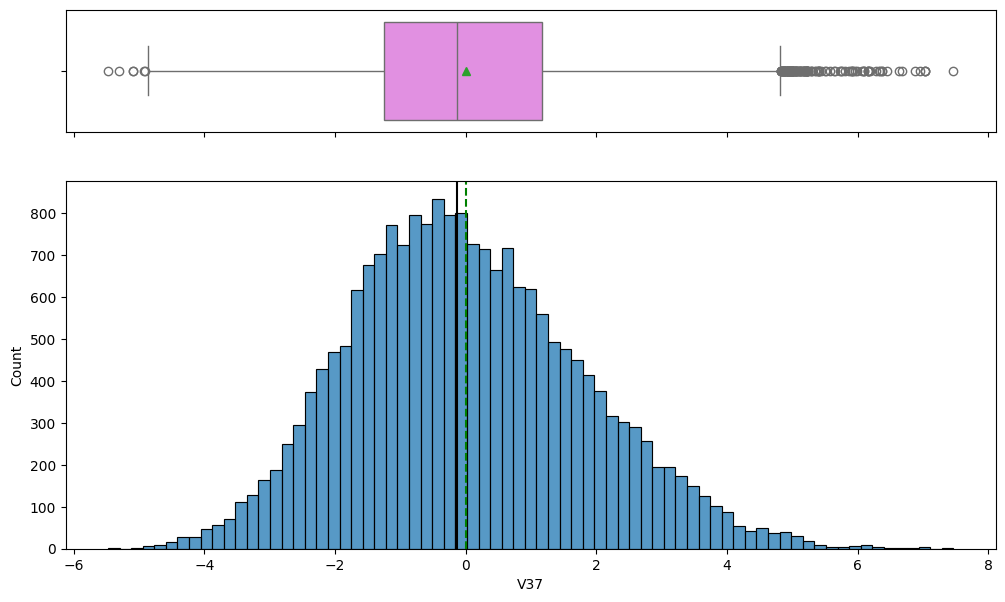

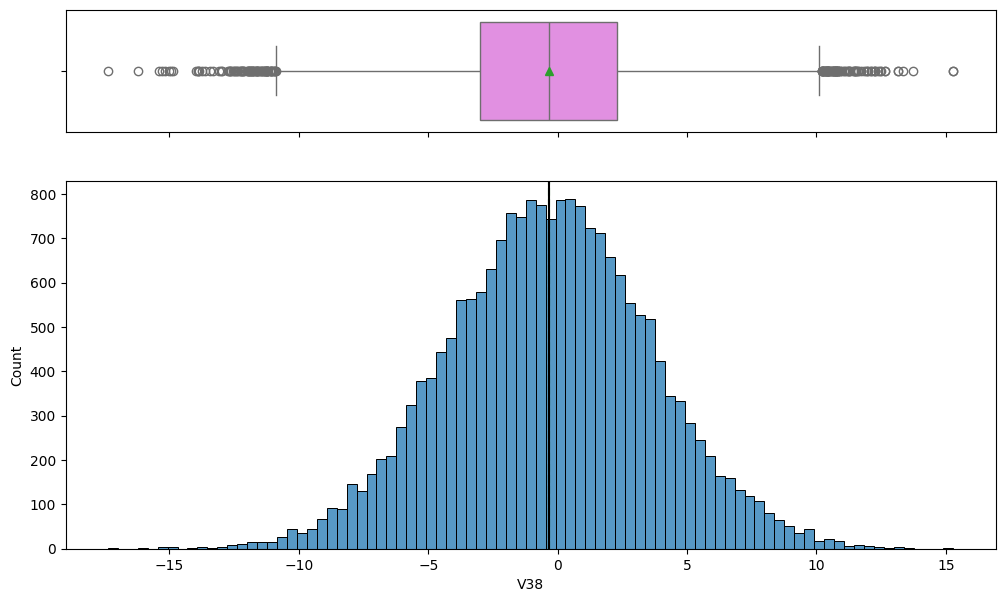

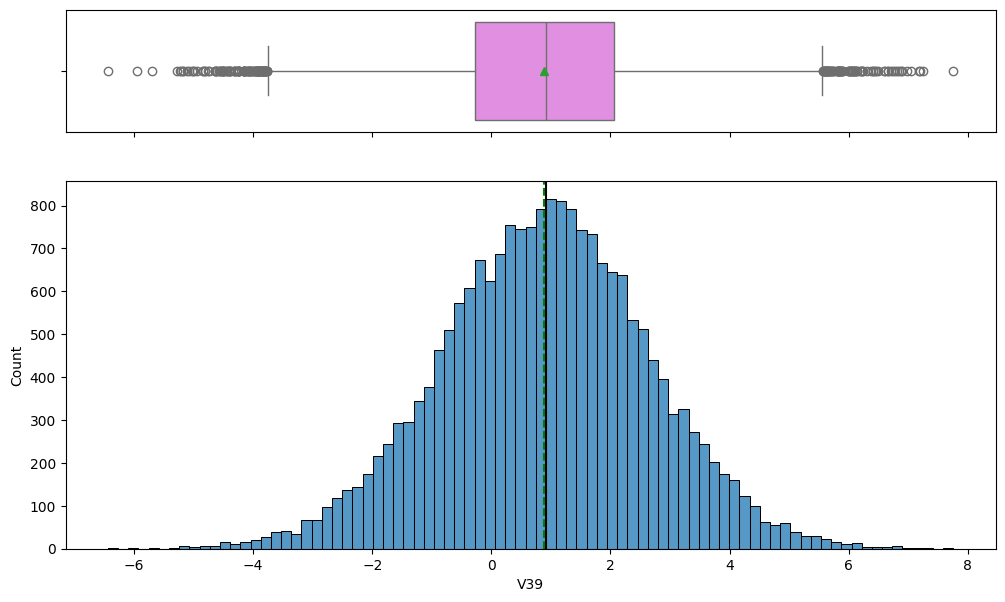

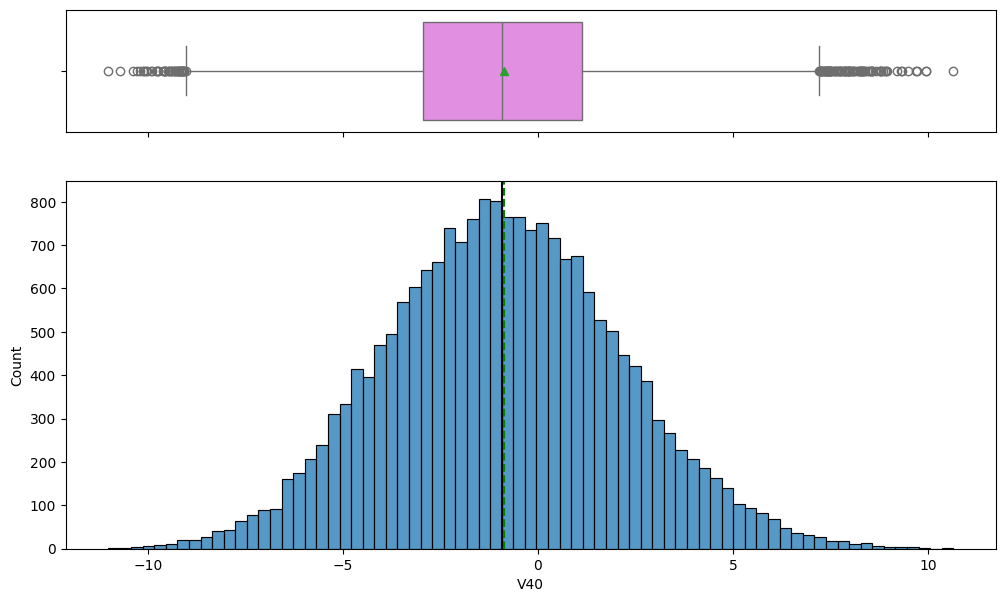

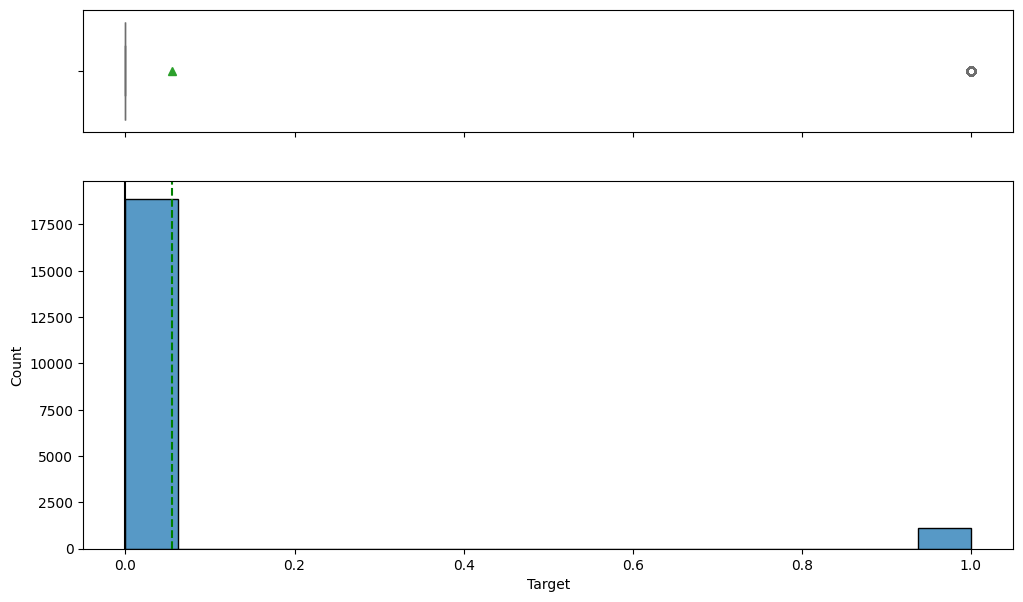

In [19]:
for feature in data.columns:
    histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None) ## Please change the dataframe name as you define while reading the data

### Observations:
* All sensors showing some outliers but as these are real values, I am not going to delete or cap.
* There is huge difference between target variable values (0 and 1), which makes it imbalanced feature.

## Data Pre-processing

In [20]:
X = data.drop('Target', axis=1)
y = data['Target']

## Missing value imputation




In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

In [23]:
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

In [24]:
X_test = data_test.drop('Target', axis=1)
y_test = data_test['Target']

In [25]:
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

In [26]:
# Checking that no column has missing values in train or test sets
print(X_train.isna().sum())
print("-" * 30)

X_val.isna().sum()
X_test.isna().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64
------------------------------


,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0
V10,0


## Model Building

### Model evaluation criterion

The nature of predictions made by the classification model will translate as follows:

- True positives (TP) are failures correctly predicted by the model.
- False negatives (FN) are real failures in a generator where there is no detection by model.
- False positives (FP) are failure detections in a generator where there is no failure.

**Which metric to optimize?**

* We need to choose the metric which will ensure that the maximum number of generator failures are predicted correctly by the model.
* We would want Recall to be maximized as greater the Recall, the higher the chances of minimizing false negatives.
* We want to minimize false negatives because if a model predicts that a machine will have no failure when there will be a failure, it will increase the maintenance cost.

**Let's define a function to output different metrics (including recall) on the train and test set and a function to show confusion matrix so that we do not have to use the same code repetitively while evaluating models.**

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Defining scorer to be used for cross-validation and hyperparameter tuning

- We want to reduce false negatives and will try to maximize "Recall".
- To maximize Recall, we can use Recall as a **scorer** in cross-validation and hyperparameter tuning.

In [29]:
# Type of scoring used to compare parameter combinations
from sklearn import metrics
scorer = metrics.make_scorer(metrics.recall_score)

### Model Building with original data

Sample Decision Tree model building with original data

In [30]:
# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Bagging Classifier", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Cross-validation performance on training dataset
train_recall_scores_means = []  # To store cross-validation mean recall scores
train_recall_scores_all = []  # To store all cross-validation recall scores for boxplot
names = []  # To store model names

# Cross-Validation Performance on Training Dataset
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold)
    train_recall_scores_means.append(np.mean(cv_result))  # Store the mean score
    train_recall_scores_all.append(cv_result)  # Store all fold scores for boxplot
    names.append(name)

# Validation performance with detailed metrics
accuracy_list, recall_list, precision_list, f1_list = [], [], [], []

# Validation Performance with Detailed Metrics
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)

# Creating a performance matrix DataFrame
performance_matrix = pd.DataFrame({
    'Model': names,
    'Train Recall': train_recall_scores_means,
    'Validation Recall': recall_list,
    'Validation Accuracy': accuracy_list,
    'Validation Precision': precision_list,
    'Validation F1 Score': f1_list
})

,Model,Train Recall,Validation Recall,Validation Accuracy,Validation Precision,Validation F1 Score
0,Logistic Regression,0.489881,0.490991,0.966750,0.844961,0.621083
1,Decision Tree,0.719628,0.738739,0.971250,0.742081,0.740406
2,Bagging Classifier,0.708322,0.720721,0.982000,0.941176,0.816327
3,Random Forest,0.719590,0.743243,0.985000,0.982143,0.846154
4,AdaBoost,0.621564,0.657658,0.973250,0.824859,0.731830
5,XGBoost,0.799568,0.819820,0.988750,0.973262,0.889976
6,Gradient Boosting,0.717336,0.743243,0.982250,0.921788,0.822943


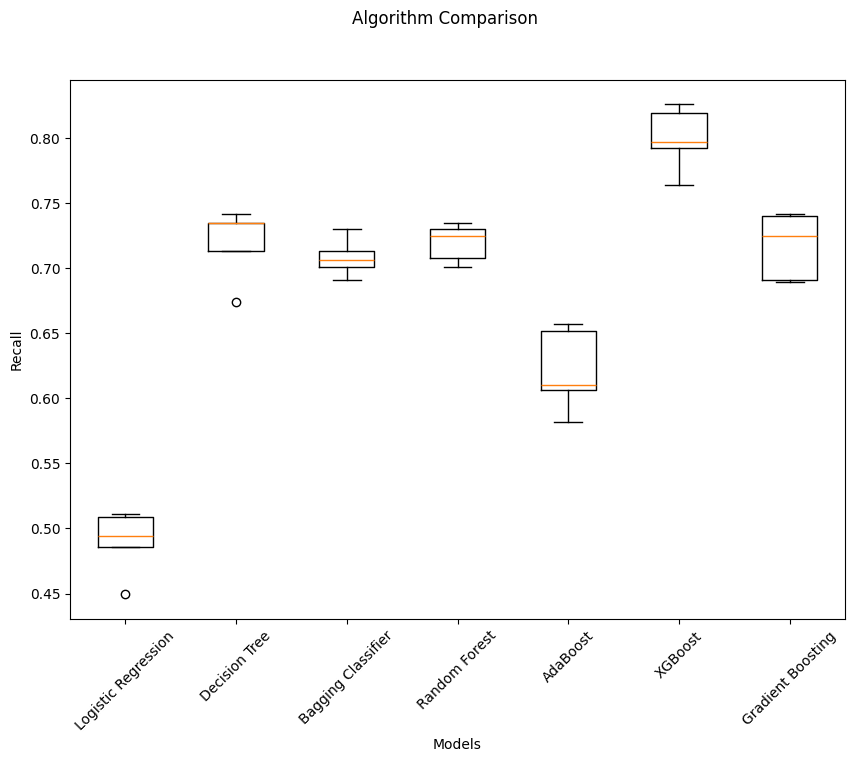

In [31]:
from IPython.display import display

# Highlight the top three best scores in each metric
styled_performance_matrix = performance_matrix.style.apply(
    lambda x: ['background: yellow' if v in x.nlargest(3).values else '' for v in x],
    subset=['Train Recall', 'Validation Recall', 'Validation Accuracy', 'Validation Precision', 'Validation F1 Score']
)

# Explicitly display the styled DataFrame
display(styled_performance_matrix)

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(train_recall_scores_all)  # Use the list of all fold scores for each model
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Recall")

plt.show()

#### Observations:
1. XGBoost appears to be the best model in this case, having the highest recall and F1 score, indicating good generalization ability.
2. Random Forest and Gradient Boosting also perform quite well, with competitive precision and recall values.
3. Logistic Regression shows the weakest performance, with the lowest recall and F1 score.
4. Precision vs. Recall: Most ensemble methods (e.g., Bagging, Random Forest, Gradient Boosting) tend to have high precision, whereas boosting methods like XGBoost show a good balance between precision and recall.

* XGBoost appears to be promising best model, will test later.

### Model Building with Oversampled data


In [32]:
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 888
Before UpSampling, counts of label 'No': 15112 

After UpSampling, counts of label 'Yes': 15112
After UpSampling, counts of label 'No': 15112 

After UpSampling, the shape of train_X: (30224, 40)
After UpSampling, the shape of train_y: (30224,) 



To handle imbalance in "Target" attribute, synthetic minority oversampling technique has been used to generate synthetic data points for minority class of importance (i.e, class "1") using K-Nearest Neighbours
After applying SMOTE, we have equal number of class "1" and class "0" target outcomes

,Model,Train Recall,Validation Recall,Validation Accuracy,Validation Precision,Validation F1 Score
0,Logistic Regression,0.881287,0.851351,0.868500,0.277126,0.418142
1,Decision Tree,0.973267,0.819820,0.949250,0.527536,0.641975
2,Bagging Classifier,0.978163,0.842342,0.978250,0.782427,0.811280
3,Random Forest,0.985574,0.855856,0.988500,0.931373,0.892019
4,AdaBoost,0.893528,0.855856,0.906500,0.357143,0.503979
5,XGBoost,0.990339,0.864865,0.987250,0.901408,0.882759
6,Gradient Boosting,0.923967,0.882883,0.962500,0.612500,0.723247


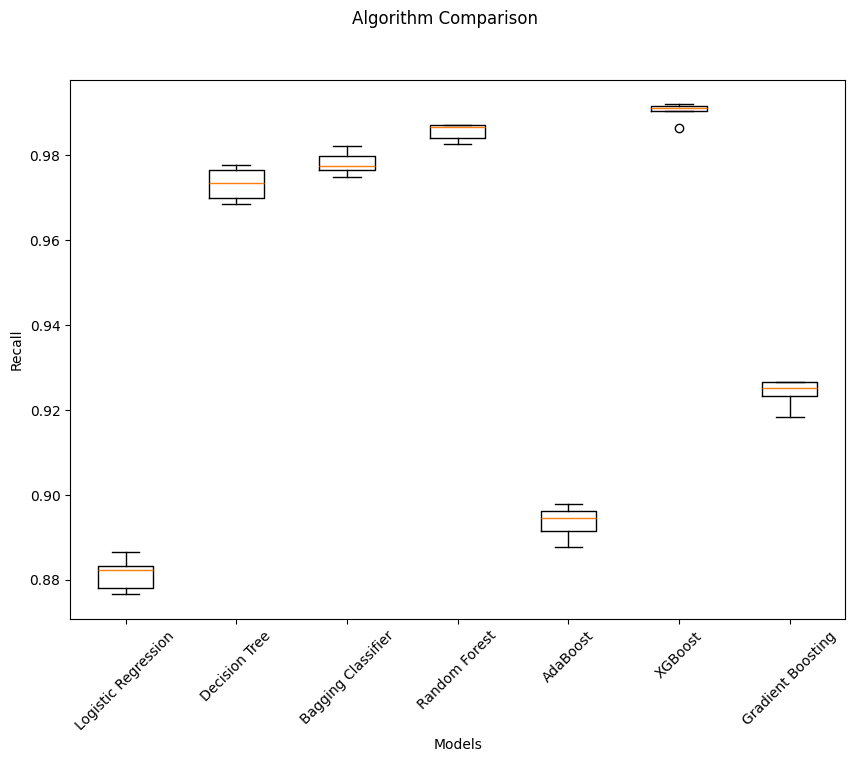

In [33]:
# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Bagging Classifier", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Cross-validation performance on training dataset
train_recall_scores_means = []  # To store cross-validation mean recall scores
train_recall_scores_all = []  # To store all cross-validation recall scores for boxplot
names = []  # To store model names

# Cross-Validation Performance on Training Dataset
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold)
    train_recall_scores_means.append(np.mean(cv_result))  # Store the mean score
    train_recall_scores_all.append(cv_result)  # Store all fold scores for boxplot
    names.append(name)

# Validation performance with detailed metrics
accuracy_list, recall_list, precision_list, f1_list = [], [], [], []

# Validation Performance with Detailed Metrics
for name, model in models:
    model.fit(X_train_over, y_train_over)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)

# Creating a performance matrix DataFrame
performance_matrix = pd.DataFrame({
    'Model': names,
    'Train Recall': train_recall_scores_means,
    'Validation Recall': recall_list,
    'Validation Accuracy': accuracy_list,
    'Validation Precision': precision_list,
    'Validation F1 Score': f1_list
})

from IPython.display import display

# Highlight the top three best scores in each metric
styled_performance_matrix = performance_matrix.style.apply(
    lambda x: ['background: yellow' if v in x.nlargest(3).values else '' for v in x],
    subset=['Train Recall', 'Validation Recall', 'Validation Accuracy', 'Validation Precision', 'Validation F1 Score']
)
# Explicitly display the styled DataFrame
display(styled_performance_matrix)

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(train_recall_scores_all)  # Use the list of all fold scores for each model
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Recall")

plt.show()

#### Observations:
* There is imporovement in scores, so oversampling will improve our insights.
* XGBoost and Random Forest are the best models for this problem, given their high recall , precision, and overall balanced performance.
* If the focus is strictly on avoiding missed failures (minimizing false negatives), Gradient Boosting could also be considered due to its high recall.

### Model Building with Undersampled data

In [34]:
# Random undersampler for under sampling the data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [35]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 888
Before UnderSampling, counts of label '0': 15112 

After UnderSampling, counts of label '1': 888
After UnderSampling, counts of label '0': 888 

After UnderSampling, the shape of train_X: (1776, 40)
After UnderSampling, the shape of train_y: (1776,) 



The undersampling technique uses random samples from the majority class for the model building. While this helps address potential overfitting, it can lead to poor performing models due to loss of information. After undersampling, we have an equal number of class "1" and class "0"

,Model,Train Recall,Validation Recall,Validation Accuracy,Validation Precision,Validation F1 Score
0,Logistic Regression,0.851324,0.864865,0.855500,0.259459,0.399168
1,Decision Tree,0.846836,0.846847,0.816250,0.211474,0.338434
2,Bagging Classifier,0.870463,0.891892,0.932000,0.443946,0.592814
3,Random Forest,0.897505,0.878378,0.944000,0.497449,0.635179
4,AdaBoost,0.871593,0.855856,0.880750,0.299213,0.443407
5,XGBoost,0.895271,0.891892,0.951000,0.535135,0.668919
6,Gradient Boosting,0.890745,0.887387,0.924750,0.416490,0.566906


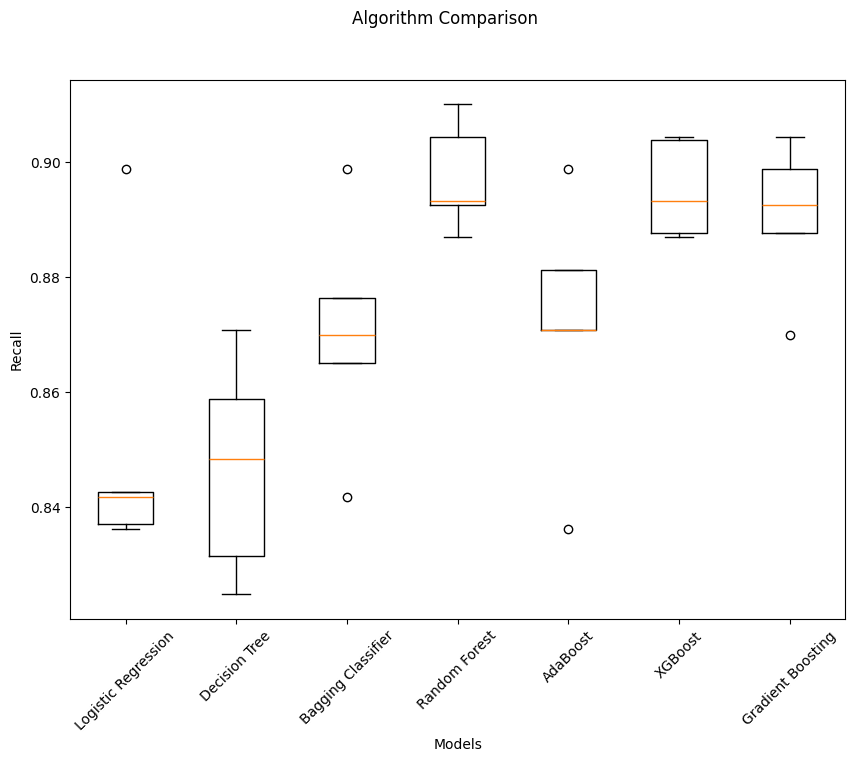

In [36]:
# Defining the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=1)),
    ("Decision Tree", DecisionTreeClassifier(random_state=1)),
    ("Bagging Classifier", BaggingClassifier(random_state=1)),
    ("Random Forest", RandomForestClassifier(random_state=1)),
    ("AdaBoost", AdaBoostClassifier(random_state=1)),
    ("XGBoost", XGBClassifier(random_state=1)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=1))
]

# Cross-validation performance on training dataset
train_recall_scores_means = []  # To store cross-validation mean recall scores
train_recall_scores_all = []  # To store all cross-validation recall scores for boxplot
names = []  # To store model names

# Cross-Validation Performance on Training Dataset
for name, model in models:
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    cv_result = cross_val_score(estimator=model, X=X_train_un, y=y_train_un, scoring=scorer, cv=kfold)
    train_recall_scores_means.append(np.mean(cv_result))  # Store the mean score
    train_recall_scores_all.append(cv_result)  # Store all fold scores for boxplot
    names.append(name)

# Validation performance with detailed metrics
accuracy_list, recall_list, precision_list, f1_list = [], [], [], []

# Validation Performance with Detailed Metrics
for name, model in models:
    model.fit(X_train_un, y_train_un)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    precision_list.append(precision)
    f1_list.append(f1)

# Creating a performance matrix DataFrame
performance_matrix = pd.DataFrame({
    'Model': names,
    'Train Recall': train_recall_scores_means,
    'Validation Recall': recall_list,
    'Validation Accuracy': accuracy_list,
    'Validation Precision': precision_list,
    'Validation F1 Score': f1_list
})

from IPython.display import display

# Highlight the top three best scores in each metric
styled_performance_matrix = performance_matrix.style.apply(
    lambda x: ['background: yellow' if v in x.nlargest(3).values else '' for v in x],
    subset=['Train Recall', 'Validation Recall', 'Validation Accuracy', 'Validation Precision', 'Validation F1 Score']
)

# Explicitly display the styled DataFrame
display(styled_performance_matrix)

# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(train_recall_scores_all)  # Use the list of all fold scores for each model
ax.set_xticklabels(names)
plt.xticks(rotation=45)
plt.xlabel("Models")
plt.ylabel("Recall")

plt.show()

### Conclusion:
1. Undersampling seems to slightly boost recall for some models, which is useful if the priority is to minimize the chance of missed failures, but it comes at the cost of lower precision, leading to increased false positives.

2. Given the business context where the cost of false negatives (missed failures) is much higher than the cost of false positives (unnecessary inspections), **oversampling with XGBoost** or Random Forest seems to be the most effective approach. It provides high recall while also controlling for false positives better than undersampling.

## HyperparameterTuning

### Sample Parameter Grids

**Hyperparameter tuning can take a long time to run, so to avoid that time complexity - you can use the following grids, wherever required.**

- For Gradient Boosting:

param_grid = {
    "n_estimators": np.arange(100,150,25),
    "learning_rate": [0.2, 0.05, 1],
    "subsample":[0.5,0.7],
    "max_features":[0.5,0.7]
}

- For Adaboost:

param_grid = {
    "n_estimators": [100, 150, 200],
    "learning_rate": [0.2, 0.05],
    "base_estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}

- For Bagging Classifier:

param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}

- For Random Forest:

param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

- For Decision Trees:

param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

- For Logistic Regression:

param_grid = {'C': np.arange(0.1,1.1,0.1)}

- For XGBoost:

param_grid={
    'n_estimators': [150, 200, 250],
    'scale_pos_weight': [5,10],
    'learning_rate': [0.1,0.2],
    'gamma': [0,3,5],
    'subsample': [0.8,0.9]
}

#### Note: Decision Tree, Logistic Regression and AdaBoost do not appear to be promising models therefore hypertuning may be not necessary for these models. However, I will go extra mile and tune all models.

### Decision Tree

### Sample tuning method for Decision tree with original data

In [37]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.0001, 'max_leaf_nodes': 15, 'max_depth': 5} with CV score=0.5675998222560782:


In [38]:
# Creating new pipeline with best parameters
# best_params = {
#     'min_samples_leaf': 7,
#     'min_impurity_decrease': 0.0001,
#     'max_leaf_nodes': 15,
#     'max_depth': 5
# }

# Creating new pipeline with best parameters
dtree_tuned = DecisionTreeClassifier(**randomized_cv.best_params_)
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15,
                       min_impurity_decrease=0.0001, min_samples_leaf=7)

In [39]:
dtree_tuned_train_performance = model_performance_classification_sklearn(dtree_tuned, X_train, y_train)
dtree_tuned_val_performance = model_performance_classification_sklearn(dtree_tuned, X_val, y_val)

print("Train Performance:")
print(dtree_tuned_train_performance)

print("\nValidation Performance:")
print(dtree_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.974   0.593      0.904 0.717

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.969   0.577      0.810 0.674


### Sample tuning method for Decision tree with oversampled data

In [40]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,6),
              'min_samples_leaf': [1, 4, 7],
              'max_leaf_nodes' : [10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 7, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 15, 'max_depth': 3} with CV score=0.9143060712783726:


In [41]:
# Creating new pipeline with best parameters
# best_params = {
#     'min_samples_leaf': 7,
#     'min_impurity_decrease': 0.0001,
#     'max_leaf_nodes': 15,
#     'max_depth': 5
# }
dtree_over_tuned = DecisionTreeClassifier(**randomized_cv.best_params_)
dtree_over_tuned.fit(X_train_over, y_train_over)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=15,
                       min_impurity_decrease=0.001, min_samples_leaf=7)

In [42]:
dtree_over_tuned_train_performance = model_performance_classification_sklearn(dtree_over_tuned, X_train_over, y_train_over)
dtree_over_tuned_val_performance = model_performance_classification_sklearn(dtree_over_tuned, X_val, y_val)

print("Train Performance:")
print(dtree_over_tuned_train_performance)

print("\nValidation Performance:")
print(dtree_over_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.838   0.917      0.792 0.850

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.752   0.874      0.168 0.281


### Sample tuning method for Decision tree with undersampled data

In [43]:
# defining model
Model = DecisionTreeClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'max_depth': np.arange(2,20),
              'min_samples_leaf': [1, 2, 5, 7],
              'max_leaf_nodes' : [5, 10,15],
              'min_impurity_decrease': [0.0001,0.001] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'min_samples_leaf': 1, 'min_impurity_decrease': 0.001, 'max_leaf_nodes': 5, 'max_depth': 14} with CV score=0.8492287183393639:


In [44]:
# Creating new pipeline with best parameters
# best_params = {'min_samples_leaf': 7,
#  'min_impurity_decrease': 0.001,
#  'max_leaf_nodes': 15,
#  'max_depth': 6}

dtree_un_tuned = DecisionTreeClassifier(**randomized_cv.best_params_)
dtree_un_tuned.fit(X_train_un, y_train_un)

DecisionTreeClassifier(max_depth=14, max_leaf_nodes=5,
                       min_impurity_decrease=0.001)

In [45]:
dtree_un_tuned_train_performance = model_performance_classification_sklearn(dtree_un_tuned, X_train_un, y_train_un)
dtree_un_tuned_val_performance = model_performance_classification_sklearn(dtree_un_tuned, X_val, y_val)

print("Train Performance:")
print(dtree_un_tuned_train_performance)

print("\nValidation Performance:")
print(dtree_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.854   0.902      0.823 0.861

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.768   0.878      0.178 0.296


### Logistic Regression

### Tuning for Logistic Regression with original data

In [46]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.48091792039611503:


In [47]:
# Creating new pipeline with best parameters
# best_params = {'C': 0.2}
lr_tuned = LogisticRegression(**randomized_cv.best_params_)
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1)

In [48]:
lr_tuned_train_performance = model_performance_classification_sklearn(lr_tuned, X_train, y_train)
lr_tuned_val_performance = model_performance_classification_sklearn(lr_tuned, X_val, y_val)

print("Train Performance:")
print(lr_tuned_train_performance)

print("\nValidation Performance:")
print(lr_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.967   0.492      0.852 0.624

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.967   0.491      0.845 0.621


### Tuning for Logistic Regression with oversampled data

In [49]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8817493196326509:


In [50]:
# Creating new pipeline with best parameters-
# best_params = {'C': 0.1}
lr_over_tuned = LogisticRegression(**randomized_cv.best_params_)
lr_over_tuned.fit(X_train_over, y_train_over)

LogisticRegression(C=0.1)

In [51]:
lr_over_tuned_train_performance = model_performance_classification_sklearn(lr_over_tuned, X_train_over, y_train_over)
lr_over_tuned_val_performance = model_performance_classification_sklearn(lr_over_tuned, X_val, y_val)

print("Train Performance:")
print(lr_over_tuned_train_performance)

print("\nValidation Performance:")
print(lr_over_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.878   0.881      0.876 0.879

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.869   0.851      0.277 0.418


### Tuning for Logistic Regression with undersampled data

In [52]:
# defining model
Model = LogisticRegression(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {'C': np.arange(0.1,1.1,0.1)}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'C': 0.1} with CV score=0.8592712499206498:


In [53]:
# Creating new pipeline with best parameters-
# best_params = {'C': 0.1}
lr_un_tuned = LogisticRegression(**randomized_cv.best_params_, random_state=1)
lr_un_tuned.fit(X_train_un, y_train_un)

LogisticRegression(C=0.1, random_state=1)

In [54]:
lr_un_tuned_train_performance = model_performance_classification_sklearn(lr_un_tuned, X_train_un, y_train_un)
lr_un_tuned_val_performance = model_performance_classification_sklearn(lr_un_tuned, X_val, y_val)

print("Train Performance:")
print(lr_tuned_train_performance)

print("\nValidation Performance:")
print(lr_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.967   0.492      0.852 0.624

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.967   0.491      0.845 0.621


### Bagging Classifier

### Tuning for Bagging Classifier with original data

In [55]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 30, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.728648511394655:


In [56]:
# Creating new pipeline with best parameters
#best_params = {'max_samples': 0.9, 'max_features': 0.8, 'n_estimators': 70}

bag_tuned = BaggingClassifier(**randomized_cv.best_params_, random_state=1)
bag_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=30,
                  random_state=1)

In [57]:
bag_tuned_train_performance = model_performance_classification_sklearn(bag_tuned, X_train, y_train)
bag_tuned_val_performance = model_performance_classification_sklearn(bag_tuned, X_val, y_val)

print("Train Performance:")
print(bag_tuned_train_performance)

print("\nValidation Performance:")
print(bag_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.999   0.977      1.000 0.989

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.983   0.730      0.959 0.829


### Tuning for Bagging Classifier with oversampled data

In [58]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.9, 'max_features': 0.9} with CV score=0.9835892615034132:


In [59]:
# Creating new pipeline with best parameters
# best_params = {'max_samples': 0.9, 'max_features': 0.9, 'n_estimators': 70}

bag_over_tuned = BaggingClassifier(**randomized_cv.best_params_, random_state=1)
bag_over_tuned.fit(X_train_over, y_train_over)

BaggingClassifier(max_features=0.9, max_samples=0.9, n_estimators=70,
                  random_state=1)

In [60]:
bag_over_tuned_train_performance = model_performance_classification_sklearn(bag_over_tuned, X_train_over, y_train_over)
bag_over_tuned_val_performance = model_performance_classification_sklearn(bag_over_tuned, X_val, y_val)

print("Train Performance:")
print(bag_over_tuned_train_performance)

print("\nValidation Performance:")
print(bag_over_tuned_val_performance)


Train Performance:
   Accuracy  Recall  Precision    F1
0     1.000   1.000      1.000 1.000

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.984   0.856      0.856 0.856


### Tuning for Bagging Classifier with undersampled data

In [61]:
# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { 'max_samples': [0.8,0.9,1], 'max_features': [0.7,0.8,0.9], 'n_estimators' : [30,50,70], }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 70, 'max_samples': 0.8, 'max_features': 0.7} with CV score=0.8953215260585285:


In [62]:
# Creating new pipeline with best parameters
# best_params = {'max_samples': 0.9, 'max_features': 0.8, 'n_estimators': 70}
bag_un_tuned = BaggingClassifier(**randomized_cv.best_params_, random_state=1)
bag_un_tuned.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

In [63]:
bag_un_tuned_train_performance = model_performance_classification_sklearn(bag_un_tuned, X_train_un, y_train_un)
bag_un_tuned_val_performance = model_performance_classification_sklearn(bag_un_tuned, X_val, y_val)

print("Train Performance:")
print(bag_un_tuned_train_performance)

print("\nValidation Performance:")
print(bag_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.997   0.994      1.000 0.997

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.941   0.883      0.484 0.625


### Random Forest

### Tuning for Random Forest Classifier with original data

In [64]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.7038786262934045:


In [65]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}

rf_tuned = RandomForestClassifier(**randomized_cv.best_params_, random_state=1)
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [66]:
rf_tuned_train_performance = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_val_performance = model_performance_classification_sklearn(rf_tuned, X_val, y_val)

print("Train Performance:")
print(rf_tuned_train_performance)

print("\nValidation Performance:")
print(rf_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.995   0.913      1.000 0.955

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.984   0.730      0.982 0.837


### Tuning for Random Forest Classifier with oversampled data

In [67]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9808099737442019:


In [68]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 250, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}

rf_over_tuned = RandomForestClassifier(**randomized_cv.best_params_, random_state=1)
rf_over_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=300, random_state=1)

In [69]:
rf_over_tuned_train_performance = model_performance_classification_sklearn(rf_over_tuned, X_train_over, y_train_over)
rf_over_tuned_val_performance = model_performance_classification_sklearn(rf_over_tuned, X_val, y_val)

print("Train Performance:")
print(rf_over_tuned_train_performance)

print("\nValidation Performance:")
print(rf_over_tuned_val_performance)


Train Performance:
   Accuracy  Recall  Precision    F1
0     1.000   0.999      1.000 1.000

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.988   0.865      0.919 0.891


### Tuning for Random Forest Classifier with undersampled data

In [70]:
# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [200,250,300], "min_samples_leaf": np.arange(1, 4), "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'], "max_samples": np.arange(0.4, 0.7, 0.1) }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 250, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.8941979305529106:


In [71]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 300, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'}
rf_un_tuned = RandomForestClassifier(**randomized_cv.best_params_, random_state=1)
rf_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=250,
                       random_state=1)

In [72]:
rf_un_tuned_train_performance = model_performance_classification_sklearn(rf_un_tuned, X_train_un, y_train_un)
rf_un_tuned_val_performance = model_performance_classification_sklearn(rf_un_tuned, X_val, y_val)

print("Train Performance:")
print(bag_un_tuned_train_performance)

print("\nValidation Performance:")
print(bag_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.997   0.994      1.000 0.997

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.941   0.883      0.484 0.625


### Gradient Boost

### Tuning for Gradient Boosting with original data

In [73]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.7557354154764171:


In [74]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 125, 'learning_rate': 0.2, 'subsample': 0.7, 'max_features': 0.5}
gbm_tuned = GradientBoostingClassifier(**randomized_cv.best_params_, random_state=1)
gbm_tuned.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [75]:
gbm_tuned_train_performance = model_performance_classification_sklearn(gbm_tuned, X_train, y_train)
gbm_tuned_val_performance = model_performance_classification_sklearn(gbm_tuned, X_val, y_val)

print("Train Performance:")
print(gbm_tuned_train_performance)

print("\nValidation Performance:")
print(gbm_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.994   0.903      0.991 0.945

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.982   0.761      0.894 0.822


### Tuning for Gradient Boosting with oversampled data

In [76]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 1} with CV score=0.9675751074981506:


In [77]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 125, 'learning_rate': 1, 'subsample': 0.7, 'max_features': 0.5}
gbm_over_tuned = GradientBoostingClassifier(**randomized_cv.best_params_, random_state=1)
gbm_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=1, max_features=0.5, n_estimators=125,
                           random_state=1, subsample=0.7)

In [78]:
gbm_over_tuned_train_performance = model_performance_classification_sklearn(gbm_over_tuned, X_train_over, y_train_over)
gbm_over_tuned_val_performance = model_performance_classification_sklearn(gbm_over_tuned, X_val, y_val)

print("Train Performance:")
print(gbm_over_tuned_train_performance)

print("\nValidation Performance:")
print(gbm_over_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.991   0.991      0.992 0.991

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.964   0.838      0.628 0.718


### Tuning for Gradient Boosting with undersampled data

In [79]:
# defining model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 125, 'max_features': 0.5, 'learning_rate': 0.2} with CV score=0.9020567510950295:


In [80]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 125, 'learning_rate': 0.05, 'subsample': 0.5, 'max_features': 0.5}
gbm_un_tuned = GradientBoostingClassifier(**randomized_cv.best_params_, random_state=1)
gbm_un_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(learning_rate=0.2, max_features=0.5,
                           n_estimators=125, random_state=1, subsample=0.7)

In [81]:
gbm_un_tuned_train_performance = model_performance_classification_sklearn(gbm_un_tuned, X_train_un, y_train_un)
gbm_un_tuned_val_performance = model_performance_classification_sklearn(gbm_un_tuned, X_val, y_val)

print("Train Performance:")
print(gbm_un_tuned_train_performance)

print("\nValidation Performance:")
print(gbm_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.993   0.989      0.998 0.993

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.930   0.874      0.437 0.583


### AdaBoost

### Tuning for AdaBoost with original data

In [82]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7748365390719227:


In [83]:
# Creating new pipeline with best parameters
# best_params =  {'n_estimators': 150, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
ada_tuned = AdaBoostClassifier(**randomized_cv.best_params_, random_state=1)
ada_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [84]:
ada_tuned_train_performance = model_performance_classification_sklearn(ada_tuned, X_train, y_train)
ada_tuned_val_performance = model_performance_classification_sklearn(ada_tuned, X_val, y_val)

print("Train Performance:")
print(ada_tuned_train_performance)

print("\nValidation Performance:")
print(ada_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.999   0.980      1.000 0.990

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.986   0.775      0.961 0.858


### Tuning for AdaBoost with oversampled data

In [85]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.9690971249977833:


In [86]:
# best_params = {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
ada_over_tuned = AdaBoostClassifier(**randomized_cv.best_params_, random_state=1)
ada_over_tuned.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=200, random_state=1)

In [87]:
ada_over_tuned_train_performance = model_performance_classification_sklearn(ada_over_tuned, X_train_over, y_train_over)
ada_over_tuned_val_performance = model_performance_classification_sklearn(ada_over_tuned, X_val, y_val)

print("Train Performance:")
print(ada_over_tuned_train_performance)

print("\nValidation Performance:")
print(ada_over_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.989   0.984      0.995 0.989

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.982   0.856      0.823 0.839


### Tuning for AdaBoost with undersampled data

In [88]:
# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = { "n_estimators": [100, 150, 200], "learning_rate": [0.2, 0.05], "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1), ] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=2, random_state=1)} with CV score=0.895296134069701:


In [89]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 200, 'learning_rate': 0.2, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)}
ada_un_tuned = AdaBoostClassifier(**randomized_cv.best_params_, random_state=1)
ada_un_tuned.fit(X_train_un, y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2,
                                                    random_state=1),
                   learning_rate=0.2, n_estimators=100, random_state=1)

In [90]:
ada_un_tuned_train_performance = model_performance_classification_sklearn(ada_un_tuned, X_train_un, y_train_un)
ada_un_tuned_val_performance = model_performance_classification_sklearn(ada_un_tuned, X_val, y_val)

print("Train Performance:")
print(ada_un_tuned_train_performance)

print("\nValidation Performance:")
print(ada_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.968   0.941      0.994 0.967

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.938   0.878      0.469 0.611


### XGBoost

### Tuning for XGBoost Classifier with original data

In [91]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.8604011934234748:


In [92]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 200, 'scale_pos_weight': 10, 'learning_rate': 0.1, 'gamma': 5, 'subsample': 0.8}
xgb_tuned = XGBClassifier(**randomized_cv.best_params_, random_state=1)
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [93]:
xgb_tuned_train_performance = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_val_performance = model_performance_classification_sklearn(xgb_tuned, X_val, y_val)

print("Train Performance:")
print(xgb_tuned_train_performance)

print("\nValidation Performance:")
print(xgb_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.999   1.000      0.977 0.988

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.987   0.851      0.909 0.879


### Tuning for XGBoost Classifier with oversampled data

In [94]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 150, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9962281454360602:


In [95]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 200, 'scale_pos_weight': 10, 'learning_rate': 0.2, 'gamma': 0, 'subsample': 0.9}
xgb_over_tuned = XGBClassifier(**randomized_cv.best_params_, random_state=1)
xgb_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [96]:
xgb_over_tuned_train_performance = model_performance_classification_sklearn(xgb_over_tuned, X_train_over, y_train_over)
xgb_over_tuned_val_performance = model_performance_classification_sklearn(xgb_over_tuned, X_val, y_val)

print("Train Performance:")
print(xgb_over_tuned_train_performance)

print("\nValidation Performance:")
print(xgb_over_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.993   1.000      0.987 0.993

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.968   0.883      0.653 0.751


### Tuning for XGBoost Classifer with undersampled data

In [97]:
# defining model
Model = XGBClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid={ 'n_estimators': [150, 200, 250], 'scale_pos_weight': [5,10], 'learning_rate': [0.1,0.2], 'gamma': [0,3,5], 'subsample': [0.8,0.9] }

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.8, 'scale_pos_weight': 10, 'n_estimators': 200, 'learning_rate': 0.1, 'gamma': 5} with CV score=0.9302164667047546:


In [98]:
# Creating new pipeline with best parameters
# best_params = {'n_estimators': 200, 'scale_pos_weight': 10, 'learning_rate': 0.1, 'gamma': 5, 'subsample': 0.9}
xgb_un_tuned = XGBClassifier(**randomized_cv.best_params_, random_state=1)
xgb_un_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [99]:
xgb_un_tuned_train_performance = model_performance_classification_sklearn(xgb_un_tuned, X_train_un, y_train_un)
xgb_un_tuned_val_performance = model_performance_classification_sklearn(xgb_un_tuned, X_val, y_val)

print("Train Performance:")
print(xgb_un_tuned_train_performance)

print("\nValidation Performance:")
print(xgb_un_tuned_val_performance)

Train Performance:
   Accuracy  Recall  Precision    F1
0     0.979   1.000      0.960 0.980

Validation Performance:
   Accuracy  Recall  Precision    F1
0     0.839   0.923      0.246 0.388


## Model performance comparison and choosing the final model

In [100]:
# Define model data and their performance metrics
models_data = [
    ("Decision Tree (Tuned)", dtree_tuned_train_performance, dtree_tuned_val_performance),
    ("Decision Tree (Oversampled & Tuned)", dtree_over_tuned_train_performance, dtree_over_tuned_val_performance),
    ("Decision Tree (Undersampled & Tuned)", dtree_un_tuned_train_performance, dtree_un_tuned_val_performance),
    ("Logistic Regression (Tuned)", lr_tuned_train_performance, lr_tuned_val_performance),
    ("Logistic Regression (Oversampled & Tuned)", lr_over_tuned_train_performance, lr_over_tuned_val_performance),
    ("Logistic Regression (Undersampled & Tuned)", lr_un_tuned_train_performance, lr_un_tuned_val_performance),
    ("Bagging Classifier (Tuned)", bag_tuned_train_performance, bag_tuned_val_performance),
    ("Bagging Classifier (Oversampled & Tuned)", bag_over_tuned_train_performance, bag_over_tuned_val_performance),
    ("Bagging Classifier (Undersampled & Tuned)", bag_un_tuned_train_performance, bag_un_tuned_val_performance),
    ("Random Forest (Tuned)", rf_tuned_train_performance, rf_tuned_val_performance),
    ("Random Forest (Oversampled & Tuned)", rf_over_tuned_train_performance, rf_over_tuned_val_performance),
    ("Random Forest (Undersampled & Tuned)", rf_un_tuned_train_performance, rf_un_tuned_val_performance),
    ("Gradient Boosting Machine (Tuned)", gbm_tuned_train_performance, gbm_tuned_val_performance),
    ("Gradient Boosting Machine (Oversampled & Tuned)", gbm_over_tuned_train_performance, gbm_over_tuned_val_performance),
    ("Gradient Boosting Machine (Undersampled & Tuned)", gbm_un_tuned_train_performance, gbm_un_tuned_val_performance),
    ("AdaBoost (Tuned)", ada_tuned_train_performance, ada_tuned_val_performance),
    ("AdaBoost (Oversampled & Tuned)", ada_over_tuned_train_performance, ada_over_tuned_val_performance),
    ("AdaBoost (Undersampled & Tuned)", ada_un_tuned_train_performance, ada_un_tuned_val_performance),
    ("XGBoost (Tuned)", xgb_tuned_train_performance, xgb_tuned_val_performance),
    ("XGBoost (Oversampled & Tuned)", xgb_over_tuned_train_performance, xgb_over_tuned_val_performance),
    ("XGBoost (Undersampled & Tuned)", xgb_un_tuned_train_performance, xgb_un_tuned_val_performance)
]

# Extract specific metrics from the performance dictionaries for better readability
model_names = []
train_accuracies = []
train_recalls = []
train_precisions = []
train_f1s = []
val_accuracies = []
val_recalls = []
val_precisions = []
val_f1s = []

for model_name, train_perf, val_perf in models_data:
    model_names.append(model_name)
    # Extract metrics for training performance
    train_accuracies.append(train_perf['Accuracy'][0])
    train_recalls.append(train_perf['Recall'][0])
    train_precisions.append(train_perf['Precision'][0])
    train_f1s.append(train_perf['F1'][0])
    # Extract metrics for validation performance
    val_accuracies.append(val_perf['Accuracy'][0])
    val_recalls.append(val_perf['Recall'][0])
    val_precisions.append(val_perf['Precision'][0])
    val_f1s.append(val_perf['F1'][0])

# Create a new DataFrame with extracted metrics
readable_performance_df = pd.DataFrame({
    "Model": model_names,
    "Train Accuracy": train_accuracies,
    "Train Recall": train_recalls,
    "Train Precision": train_precisions,
    "Train F1 Score": train_f1s,
    "Validation Accuracy": val_accuracies,
    "Validation Recall": val_recalls,
    "Validation Precision": val_precisions,
    "Validation F1 Score": val_f1s
})

# Highlight the top three best scores in each metric
styled_df = readable_performance_df.style.apply(lambda x: ['background: yellow' if v in x.nlargest(3).values else '' for v in x], subset=[
    "Train Accuracy", "Train Recall", "Train Precision", "Train F1 Score", "Validation Accuracy", "Validation Recall", "Validation Precision", "Validation F1 Score"])

# Display the formatted DataFrame with highlights
styled_df


,Model,Train Accuracy,Train Recall,Train Precision,Train F1 Score,Validation Accuracy,Validation Recall,Validation Precision,Validation F1 Score
0,Decision Tree (Tuned),0.973938,0.593468,0.903945,0.716519,0.969000,0.576577,0.810127,0.673684
1,Decision Tree (Oversampled & Tuned),0.838307,0.917086,0.792260,0.850115,0.752000,0.873874,0.167530,0.281159
2,Decision Tree (Undersampled & Tuned),0.854167,0.902027,0.823227,0.860828,0.768250,0.878378,0.178082,0.296128
3,Logistic Regression (Tuned),0.967063,0.492117,0.851852,0.623840,0.966750,0.490991,0.844961,0.621083
4,Logistic Regression (Oversampled & Tuned),0.878242,0.881485,0.875805,0.878636,0.868500,0.851351,0.277126,0.418142
5,Logistic Regression (Undersampled & Tuned),0.868806,0.860360,0.875143,0.867689,0.855500,0.864865,0.259459,0.399168
6,Bagging Classifier (Tuned),0.998750,0.977477,1.000000,0.988610,0.983250,0.729730,0.958580,0.828645
7,Bagging Classifier (Oversampled & Tuned),1.000000,1.000000,1.000000,1.000000,0.984000,0.855856,0.855856,0.855856
8,Bagging Classifier (Undersampled & Tuned),0.997185,0.994369,1.000000,0.997177,0.941250,0.882883,0.483951,0.625199
9,Random Forest (Tuned),0.995188,0.913288,1.000000,0.954679,0.984250,0.729730,0.981818,0.837209


**Metrics Analysis**

* Primary Metric: Recall -
The main goal here is to maximize Recall, as this will ensure fewer missed failures (lower False Negatives), So less cases of replacement.

* Secondary Metrics: Precision and F1 Score
Once Recall is maximized, we also want to ensure that a high recall doesn't come at the expense of excessive false positives (leading to higher inspection costs). Therefore, Precision and F1 Score (the harmonic mean of precision and recall) are important secondary metrics to consider.

* XGBoost (Oversampled & Tuned)	with validation recall, precision and F1 score of 0.882883, 0.653333 and	0.750958 resepectively,  is our final best model.


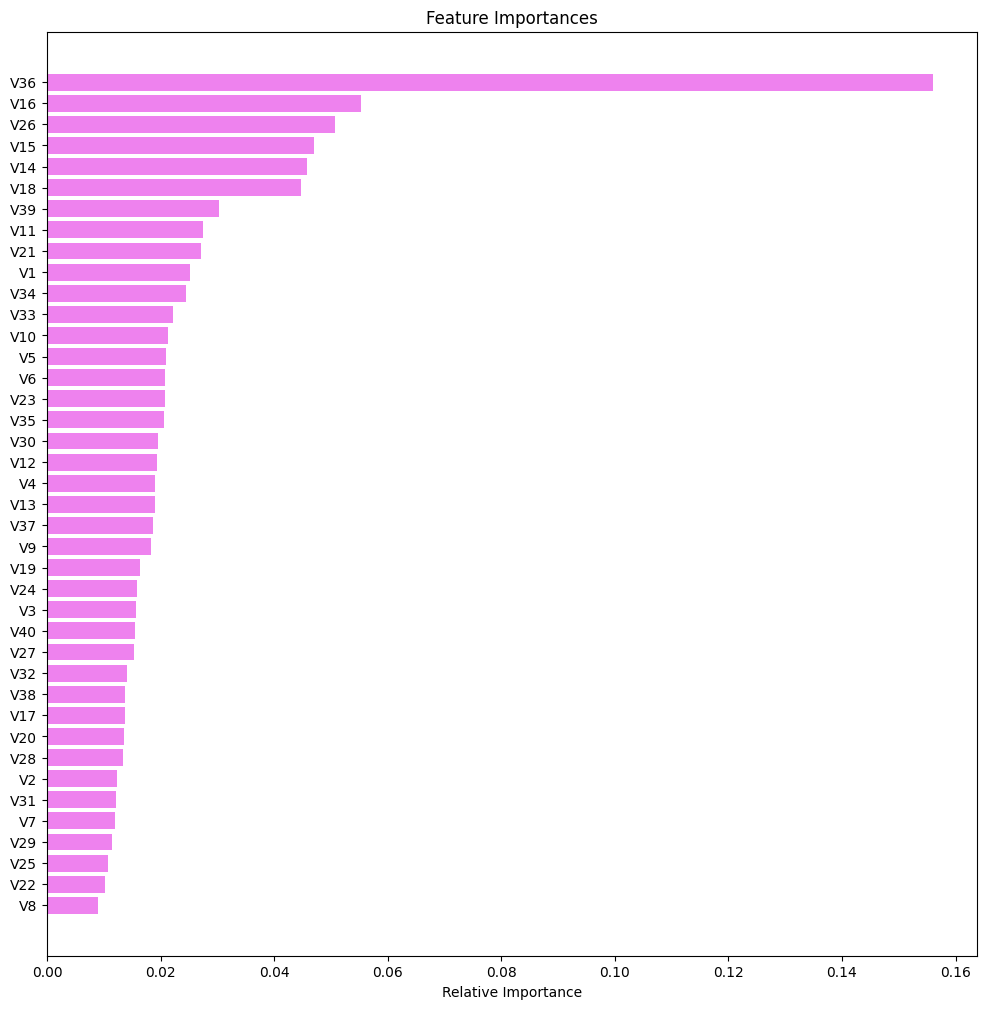

In [101]:
# Feature Importance
feature_names = X_train.columns
feature_importances = xgb_over_tuned.feature_importances_

indices = np.argsort(feature_importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), feature_importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


**Key Takeaways:**
* Feature Prioritization:

1. V36 is a standout feature and should be closely monitored in a predictive maintenance system, as it likely holds the most information about potential turbine failures.
2. V14 and V26 are also key and should be given special attention in operational settings.

* Operational Monitoring:

1. Features like V36, V14, and V26 might represent critical sensors such as temperature, vibration, or critical operating conditions. It's essential to ensure that these sensors are always functioning correctly, as they have the highest impact on predicting failures.

* Potential for Feature Reduction:

1. Since features towards the bottom of the list (e.g., V20, V17, V8) have very low importance, it may be possible to exclude them in future iterations of the model. This could lead to a simpler, more efficient model with potentially reduced computational costs, without sacrificing much predictive performance.

* Further Investigation:

1. The importance of V36 suggests it might be worthwhile to further investigate the nature of this feature. If it represents something like a sensor measuring turbine stress or a specific environmental factor, it can inform maintenance priorities.
2. Additionally, investigating how V14 and V26 interact with other features could provide insights into why they are significant and help develop more targeted maintenance actions.

### Test set final performance

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the SimpleImputer with strategy 'median'
imputer = SimpleImputer(strategy='median')

X1_train = data.drop(columns=['Target'])
y1_train = data['Target']

X_test = data_test.drop(columns=['Target'])
y_test = data_test['Target']

# Apply imputation on the features
X1_train = imputer.fit_transform(X1_train)  # Fit and transform on training data
X_test = imputer.transform(X_test)         # Only transform on test data

# oversampling
oversampler = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X1_train_over, y1_train_over = oversampler.fit_resample(X1_train, y1_train)

# Fit the tuned XGBoost model on the training data
xgb_over_tuned.fit(X1_train_over, y1_train_over)

# Predict on the test dataset
y_pred_test = xgb_over_tuned.predict(X_test)

# Calculate evaluation metrics for the test dataset
test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Display the results
print("Test Accuracy: {:.4f}".format(test_accuracy))
print("Test Recall: {:.4f}".format(test_recall))
print("Test Precision: {:.4f}".format(test_precision))
print("Test F1 Score: {:.4f}".format(test_f1))

Test Accuracy: 0.9596
Test Recall: 0.8652
Test Precision: 0.5980
Test F1 Score: 0.7072


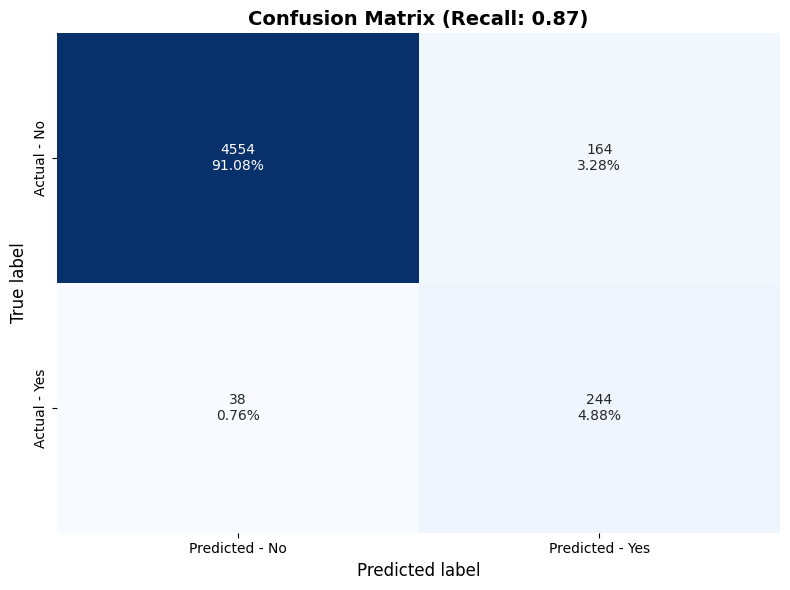

In [103]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Calculate recall for the positive class
recall = recall_score(y_test, y_pred_test)

# Create a DataFrame for the confusion matrix
df_cm = pd.DataFrame(cm, index=["Actual - No", "Actual - Yes"],
                     columns=["Predicted - No", "Predicted - Yes"])

# Calculate counts and percentages
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=labels, fmt='', cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix (Recall: {recall:.2f})", fontsize=14, weight='bold')
plt.ylabel("True label", fontsize=12)
plt.xlabel("Predicted label", fontsize=12)
plt.tight_layout()
plt.show()

## Pipelines to build the final model


In [106]:
# Assuming the final model to be XGBoost (Tuned)
# Define the pipeline with preprocessing and model
pipeline = Pipeline(steps = [
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', xgb_over_tuned)
])

# prepare the train and test datasets
X1_train = data.drop(columns=['Target'])
y1_train = data['Target']

X1_test = data_test.drop(columns=['Target'])
y_test = data_test['Target']

imputer = SimpleImputer(strategy="median")
X1_train = imputer.fit_transform(X1_train)

# oversampling
oversampler = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X1_train_over, y1_train_over = oversampler.fit_resample(X1_train, y1_train)

# Fit the pipeline on the training dataset
pipeline.fit(X1_train_over, y1_train_over)

# Predict on the test dataset
y_pred_test = pipeline.predict(X_test)

# Calculate evaluation metrics for the test dataset
test_accuracy = accuracy_score(y_test, y_pred_test)
test_recall = recall_score(y_test, y_pred_test)
test_precision = precision_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test)

# Display the results
print("Test Accuracy: {:.4f}".format(test_accuracy))
print("Test Recall: {:.4f}".format(test_recall))
print("Test Precision: {:.4f}".format(test_precision))
print("Test F1 Score: {:.4f}".format(test_f1))

Test Accuracy: 0.9596
Test Recall: 0.8652
Test Precision: 0.5980
Test F1 Score: 0.7072


# Business Insights and Conclusions

***

* Best Model: XGBoost (Oversampled and Tuned):
This model achieves a high recall (0.8652) while also maintaining moderate precision (0.5980), which minimizes replacement and slightly higher inspection costs.
It provides a balance between maximizing recall (to reduce missed failures) and maintaining precision (to prevent excessive inspections).

* The model performs very well in predicting wind turbine generator failures, achieving a high test accuracy of 95.96%. This means it correctly identifies both failures and non-failures most of the time.

* However, the recall of 86.52% suggests that there is still a notable portion of actual failures that the model misses, indicating room for improvement in reducing false negatives. The precision of 59.80 means that when the model predicts a failure, it is correct most of the time, minimizing false alarms. The F1 score of 70.76% balances both precision and recall, showing that while the model is effective, it could benefit from additional fine-tuning to better capture all failure events without compromising on accuracy.

* This performance suggests that the model is generally reliable in predicting potential issues before they happen, helping to reduce maintenance costs, but it might still miss some genuine failure cases that could be critical. Further tuning might improve the model.
* V36 is a standout feature and should be closely monitored in a predictive maintenance system, as it likely holds the most information about potential turbine failures.
V14 and V26 are also key and should be given special attention in operational settings.